# 🏡 **House Price Prediction**

**Table of contents**<a id='toc0_'></a>    
- [Exploratory Data Analysis](#toc1_)    
  - [Feature Descriptions](#toc1_1_)    
  - [Handeling Missing Values](#toc1_2_)    
    - [Plotting Null Values in Object Columns](#toc1_2_1_)    
    - [Plotting Null Values in Numeric Columns](#toc1_2_2_)    
  - [Explore Categorical Features](#toc1_3_)    
    - [Sort by Mean Price](#toc1_3_1_)    
  - [Feature Manipulation](#toc1_4_)    
    - [Feature Engeneering -](#toc1_4_1_)    
    - [Label Encoding -](#toc1_4_2_)    
    - [Target Encoding (LOO) -](#toc1_4_3_)    
  - [Explore Numerical Features](#toc1_5_)    
    - [Remove Outliers](#toc1_5_1_)    
- [Training and Testing Linear Models](#toc2_)    
  - [Filter by Correlation](#toc2_1_)    
  - [Prepare for Training](#toc2_2_)    
  - [Train and Evaluate](#toc2_3_)    
  - [Visualize Results](#toc2_4_)    
- [Fit a Neural Network](#toc3_)    
  - [Filter and Prepare Datase](#toc3_1_)    
  - [Define Train and Validation Sets](#toc3_2_)    
  - [Train Simple Network](#toc3_3_)    
  - [Visualize Training Results](#toc3_4_)    
- [Run Inferance and Save Results](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [112]:
# imports
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib_inline.backend_inline import set_matplotlib_formats

# teak some settings 
plt.style.use('ggplot')
sns.set_context('notebook')
set_matplotlib_formats('retina')
warnings.filterwarnings("ignore")

In [113]:
# dataset directory
data_dir = 'house-prices-advanced-regression-techniques/'

In [114]:
train_df = pd.read_csv(data_dir + 'train.csv')
test_df = pd.read_csv(data_dir + 'test.csv')

# <a id='toc1_'></a>[Exploratory Data Analysis](#toc0_)
- Feature Descriptions
- Handeling Missing Values
- Explore Categorical Features
- Feature Manipulation
- Explore Numerical Features

In [115]:
print(f'Train Shape: {train_df.shape}, Test Shape: {test_df.shape}')

Train Shape: (1460, 81), Test Shape: (1459, 80)


## <a id='toc1_1_'></a>[Feature Descriptions](#toc0_)

In [116]:
file_name = 'data_description.txt'
with open(data_dir + file_name, 'r') as data_description:
    description = data_description.read()

print(description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## <a id='toc1_2_'></a>[Handeling Missing Values](#toc0_)

In [117]:
train_df.isna().sum(axis=0).sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [118]:
# sperate data into object/numerical features
object_cols = train_df.columns[train_df.dtypes == 'object']
numeric_cols = train_df.columns[(train_df.dtypes == 'int64') | (train_df.dtypes == 'float64')]

print(f'Did i include all columns? --> {len(object_cols) + len(numeric_cols) == 81}')

Did i include all columns? --> True


In [119]:
numeric_nulls = train_df[numeric_cols].isna().sum().sum()
object_nulls = train_df[object_cols].isna().sum().sum()

In [120]:
total_values = train_df.shape[0] * train_df.shape[1]
print(f'Numeric Nulls: {numeric_nulls}/{total_values}, Object Nulls: {object_nulls}/{total_values}')

Numeric Nulls: 348/118260, Object Nulls: 7481/118260


### <a id='toc1_2_1_'></a>[Plotting Null Values in Object Columns](#toc0_)

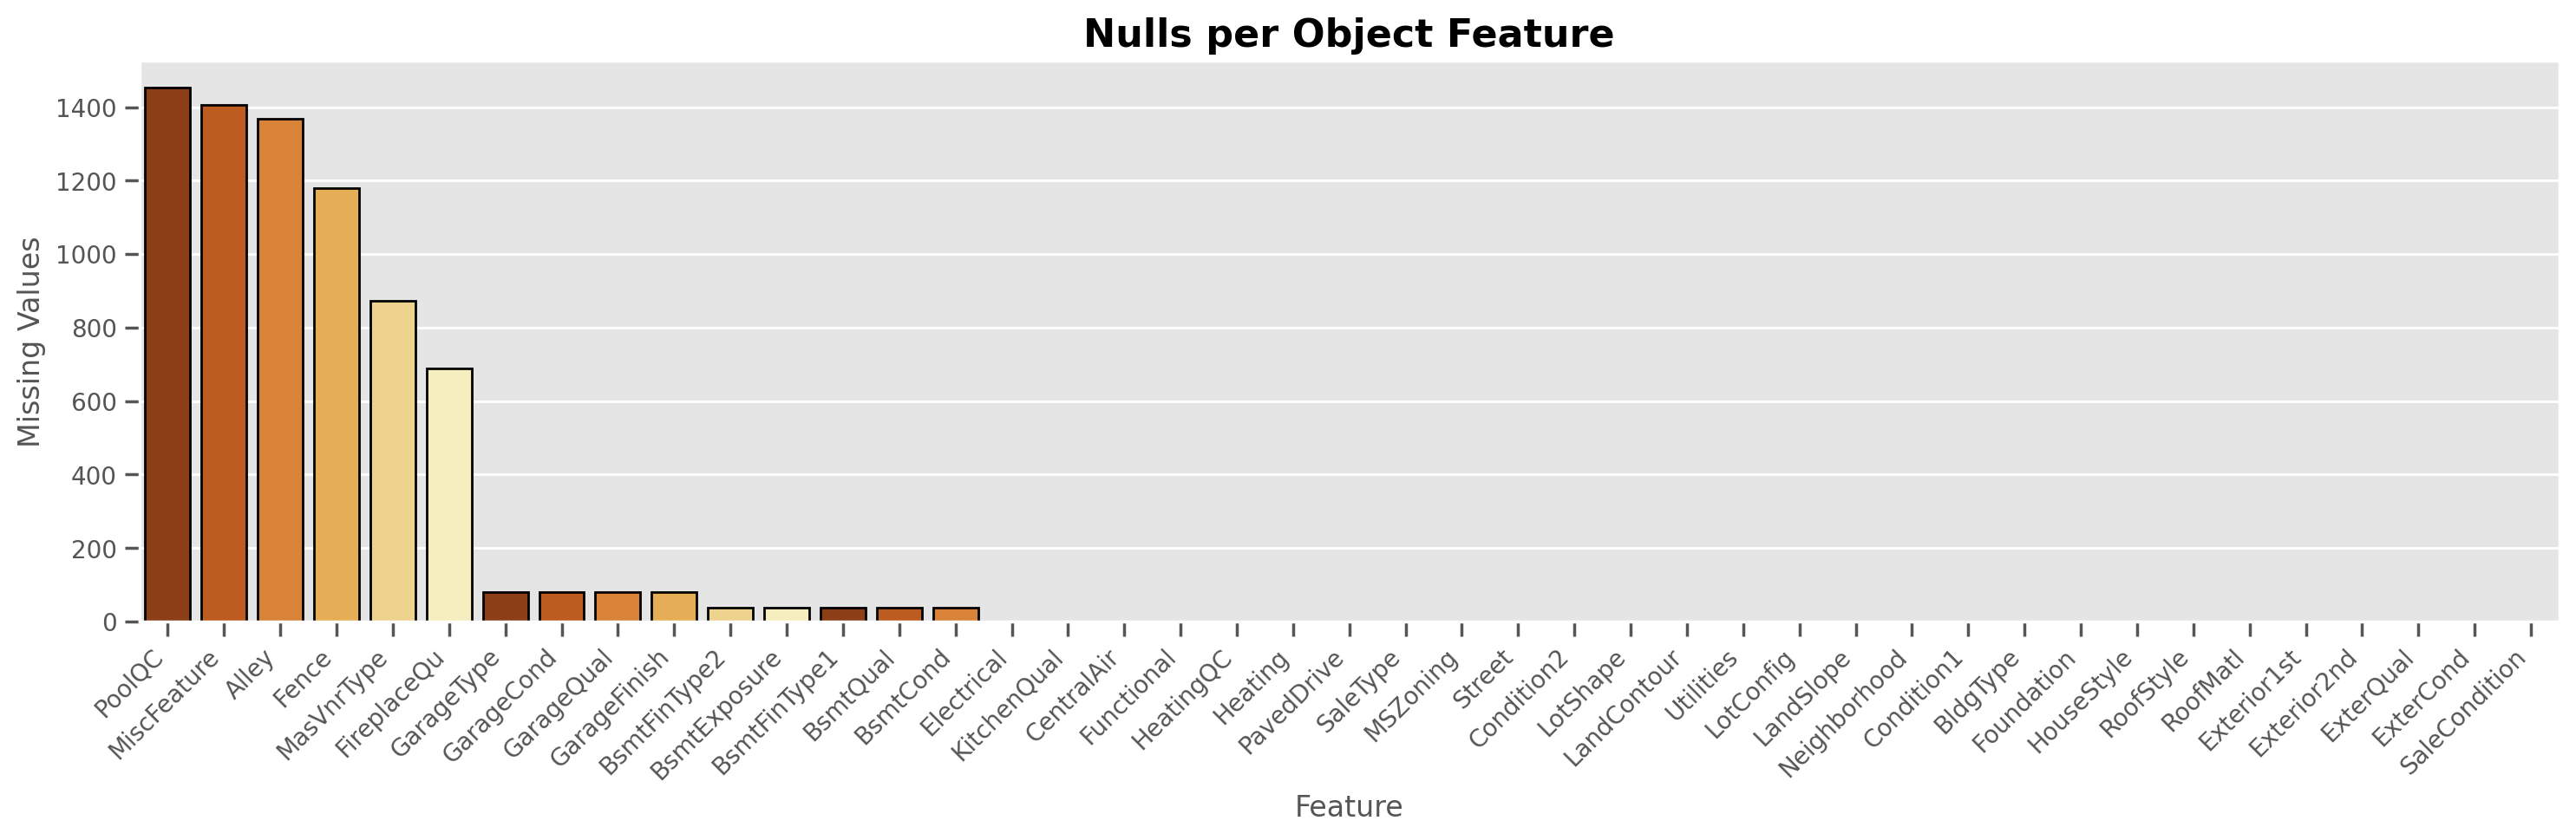

In [121]:
object_nulls_df = train_df[object_cols].isna().sum(axis=0).sort_values(ascending=False)

object_labels = object_nulls_df.index
object_nulls = object_nulls_df.values

fig = plt.figure(figsize=(15, 5))

palette = sns.color_palette('YlOrBr')[::-1]
sns.barplot(x=object_labels, y=object_nulls, edgecolor='.0', palette=palette)

plt.title('Nulls per Object Feature', fontsize=16, weight='bold')

plt.xlabel('Feature', fontsize=12), plt.ylabel('Missing Values', fontsize=12)
plt.xticks(fontsize=10, rotation=45, ha='right'), plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [122]:
redundant_object_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
train_df.drop(redundant_object_features, axis=1, inplace=True)
test_df.drop(redundant_object_features, axis=1, inplace=True)

### <a id='toc1_2_2_'></a>[Plotting Null Values in Numeric Columns](#toc0_)

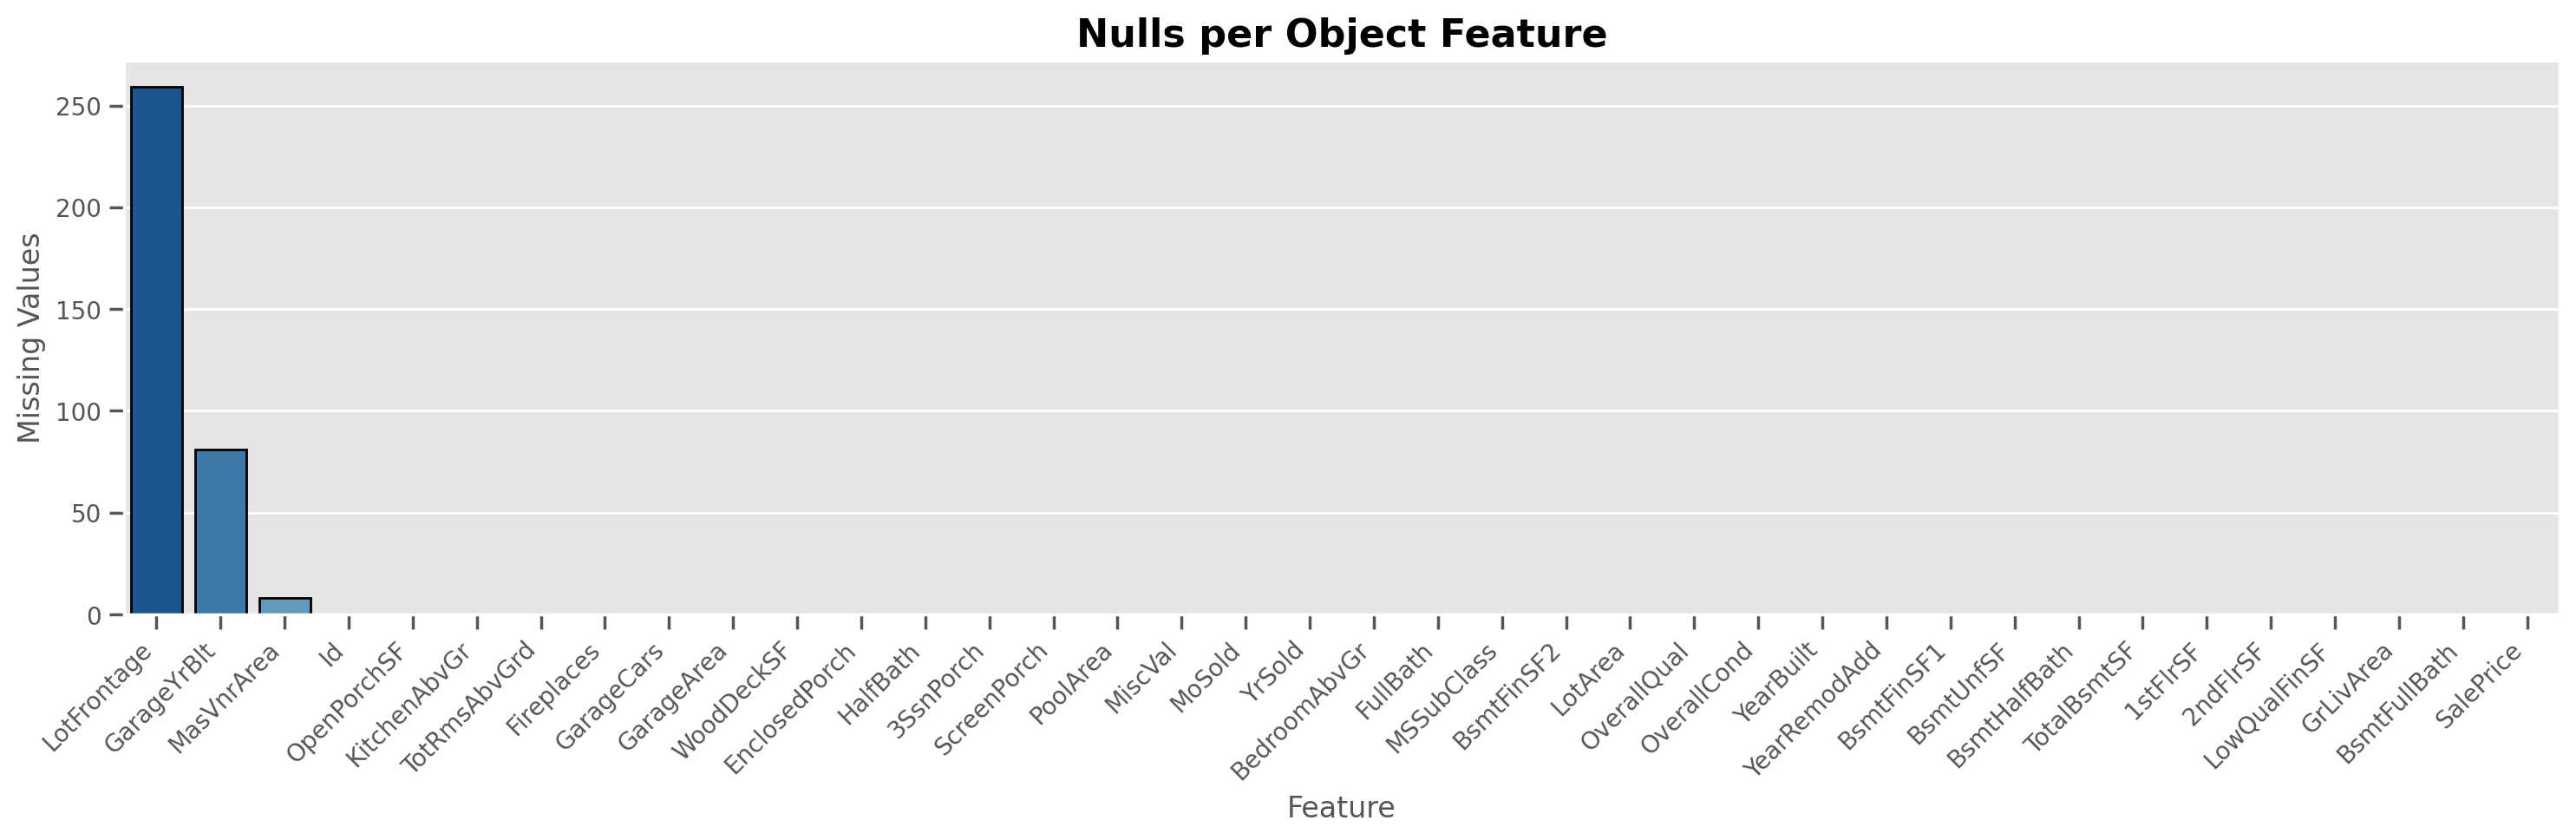

In [123]:
numeric_nulls_df = train_df[numeric_cols].isna().sum(axis=0).sort_values(ascending=False)

numeric_labels = numeric_nulls_df.index
numeric_nulls = numeric_nulls_df.values

fig = plt.figure(figsize=(15, 5))

palette = sns.color_palette('Blues')[::-1]
sns.barplot(x=numeric_labels, y=numeric_nulls, edgecolor='.0', palette=palette)

plt.title('Nulls per Object Feature', fontsize=16, weight='bold')

plt.xlabel('Feature', fontsize=12), plt.ylabel('Missing Values', fontsize=12)
plt.xticks(fontsize=10, rotation=45, ha='right'), plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [124]:
redundant_numeric_features = ['LotFrontage', 'GarageYrBlt']
train_df.drop(redundant_numeric_features, axis=1, inplace=True)
test_df.drop(redundant_numeric_features, axis=1, inplace=True)

In [125]:
object_cols = train_df.columns[train_df.dtypes == 'object']
numeric_cols = train_df.columns[(train_df.dtypes == 'int64') | (train_df.dtypes == 'float64')]
print(f'Did i Drop Columns? --> {len(object_cols) + len(numeric_cols) < 81}')

Did i Drop Columns? --> True


## <a id='toc1_3_'></a>[Explore Categorical Features](#toc0_)

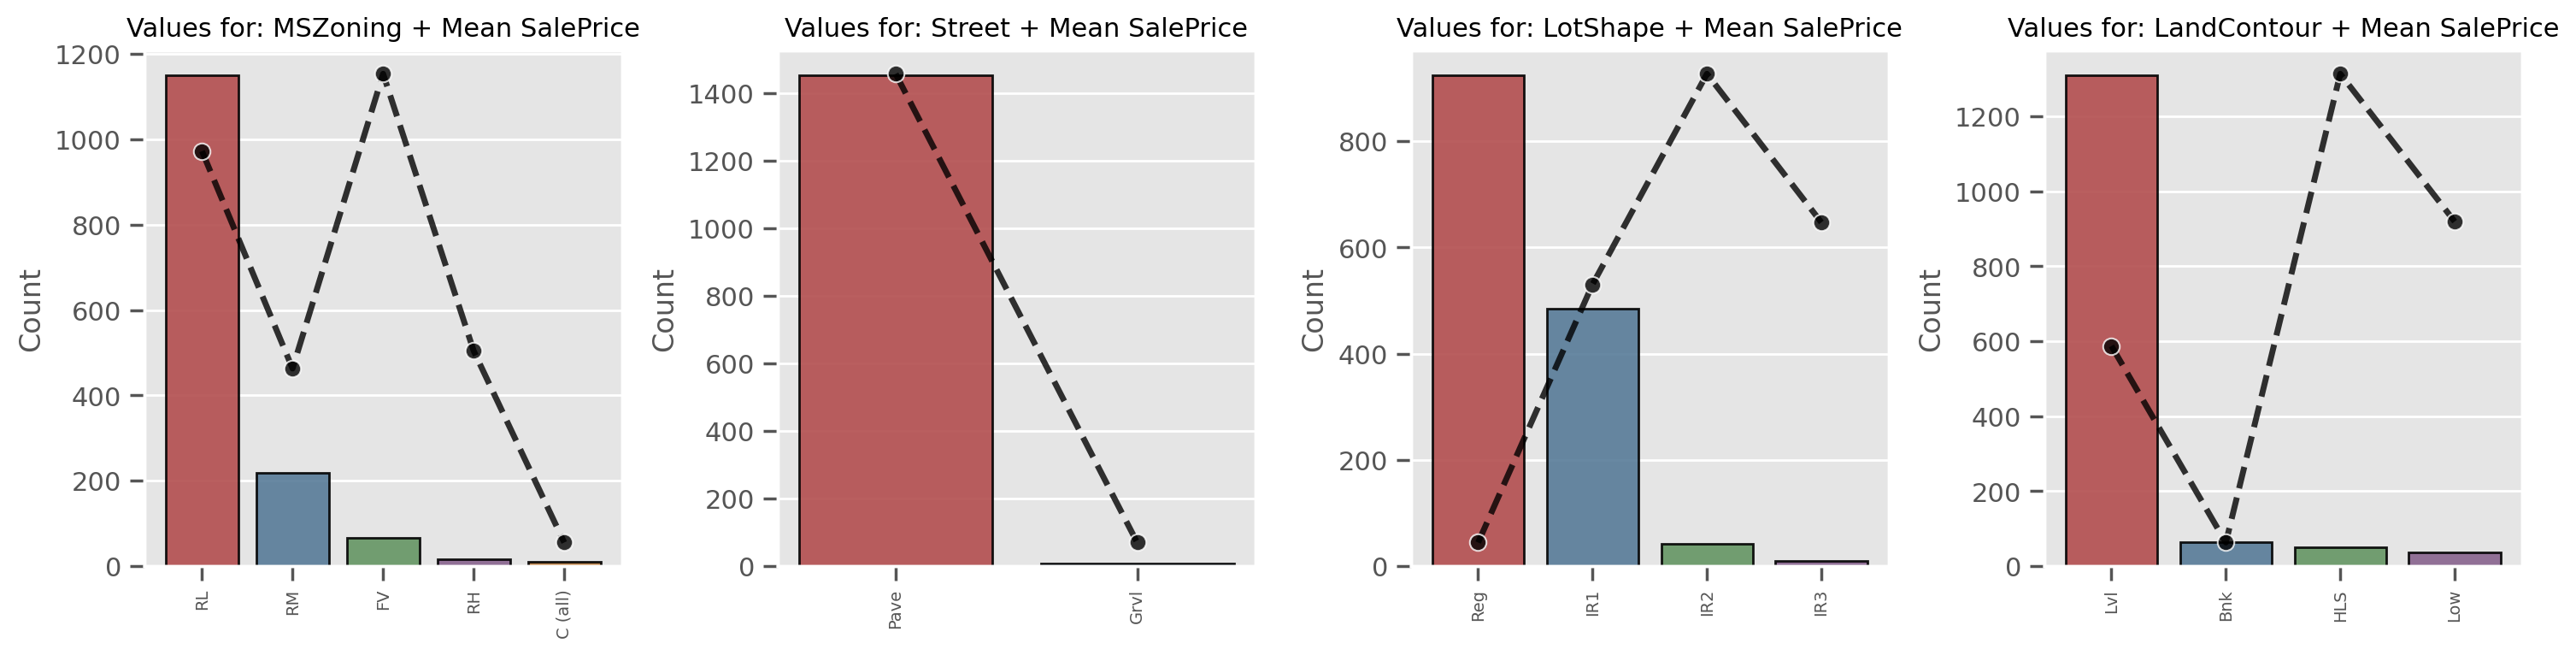

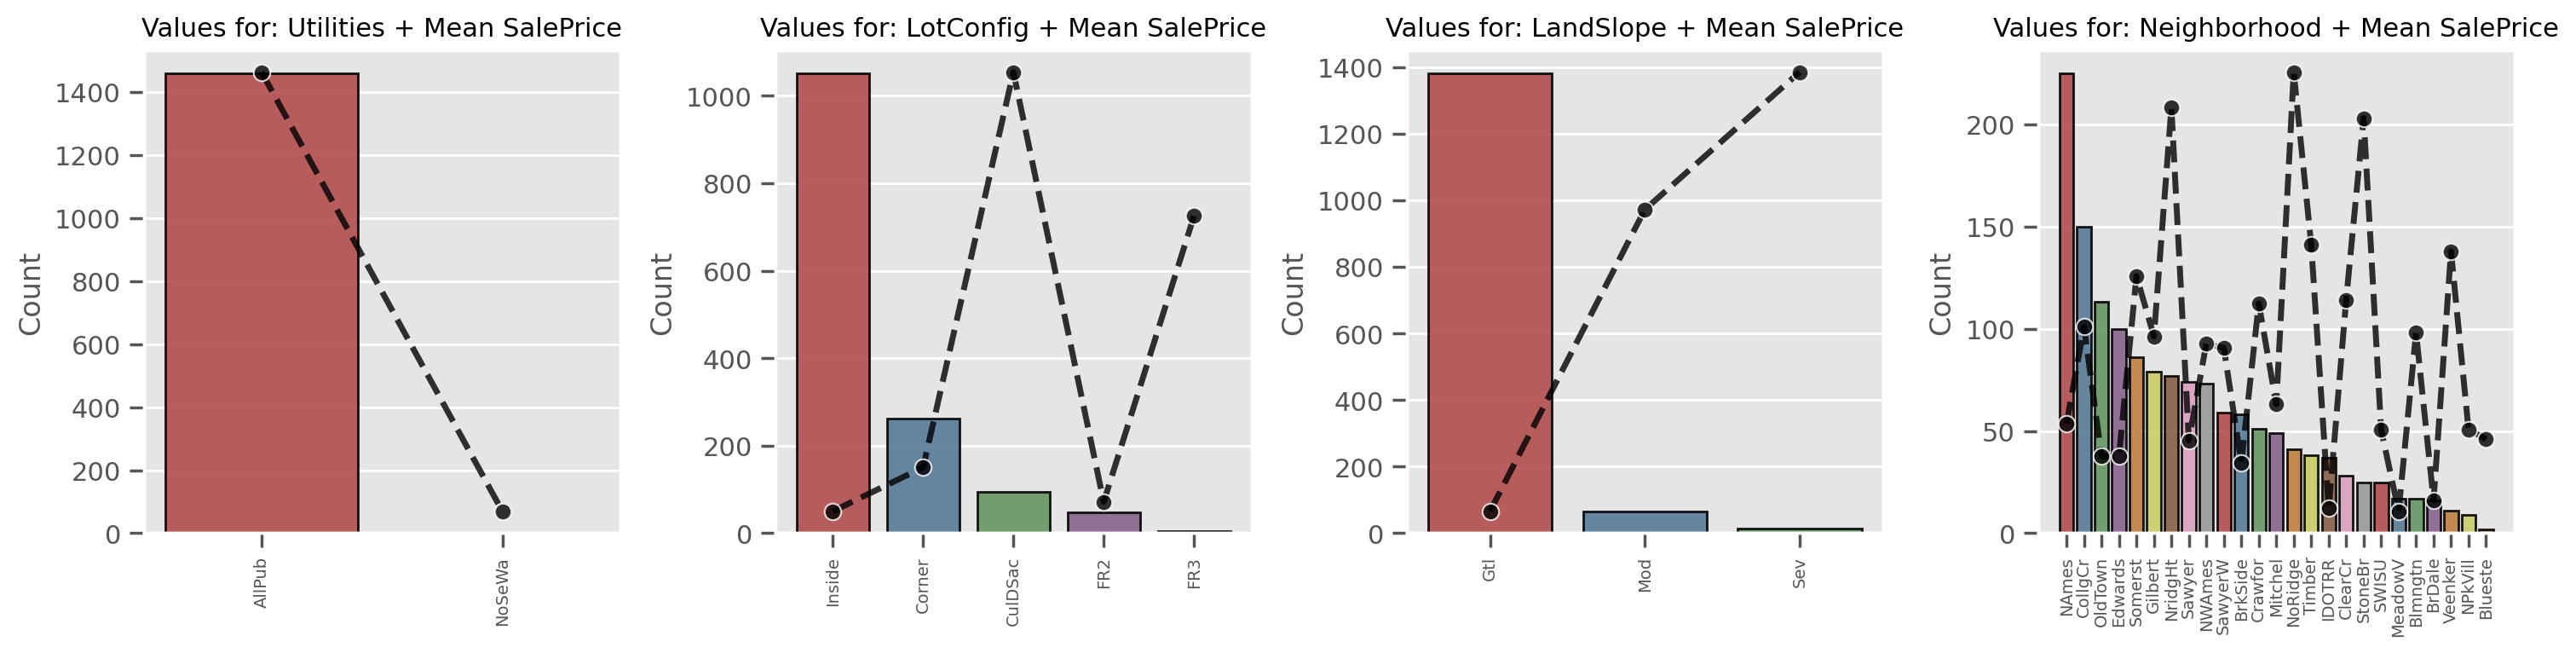

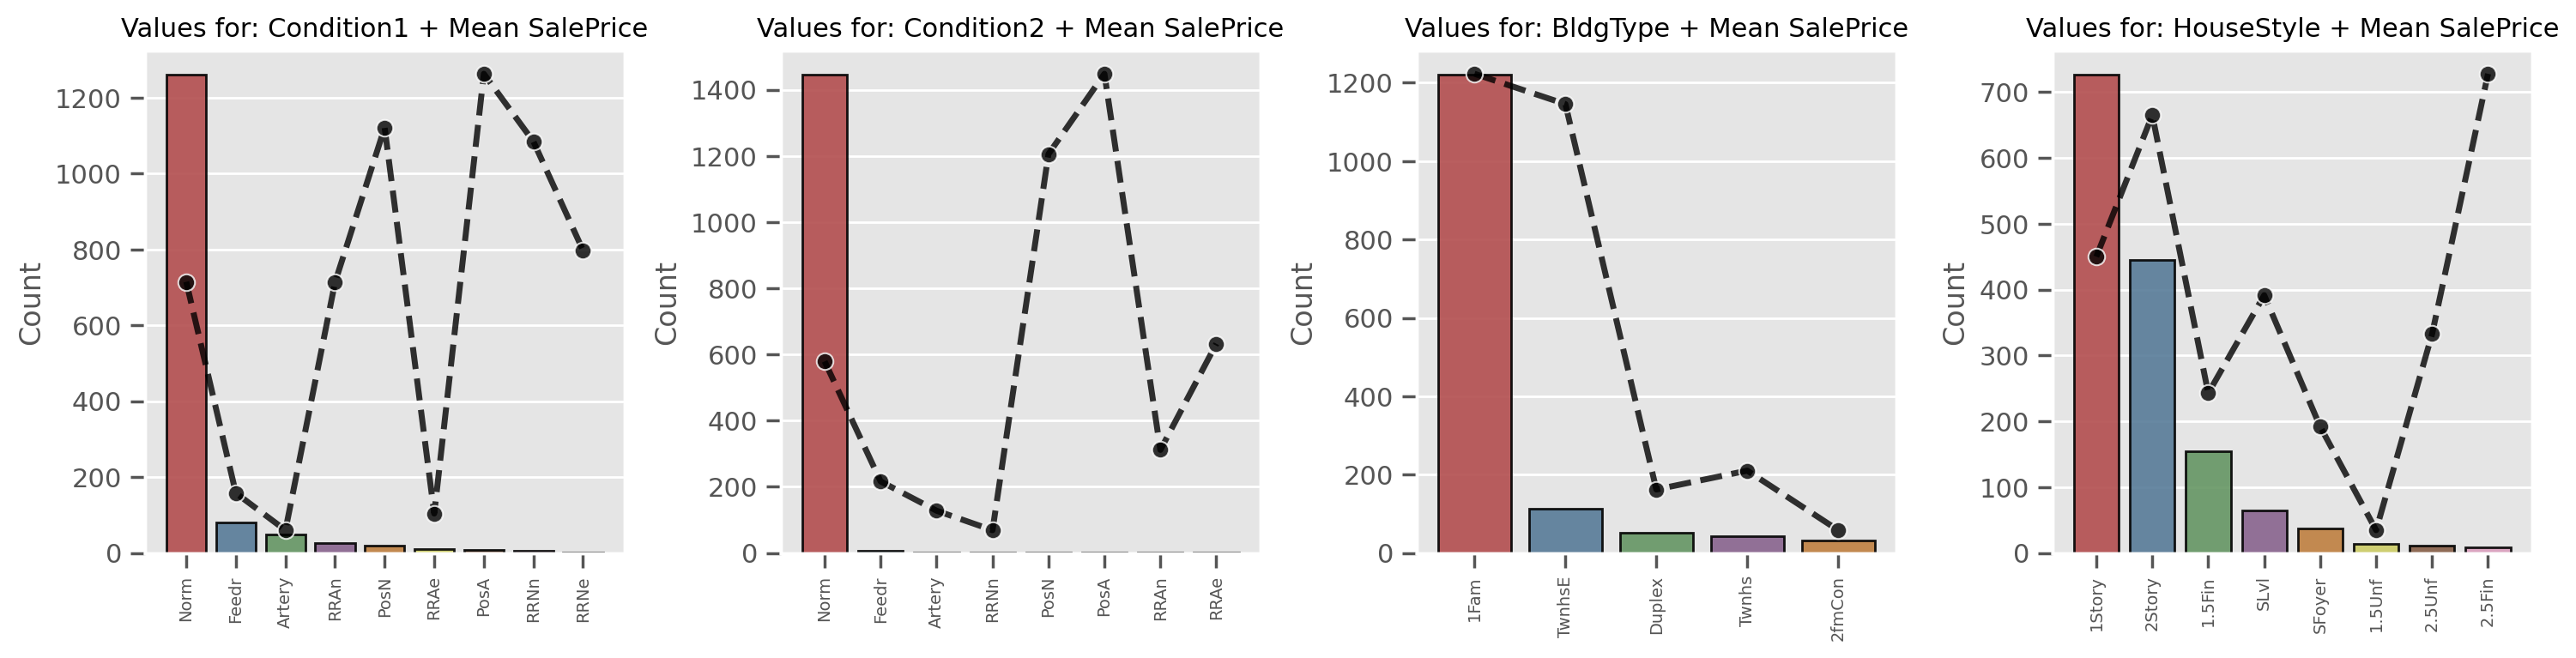

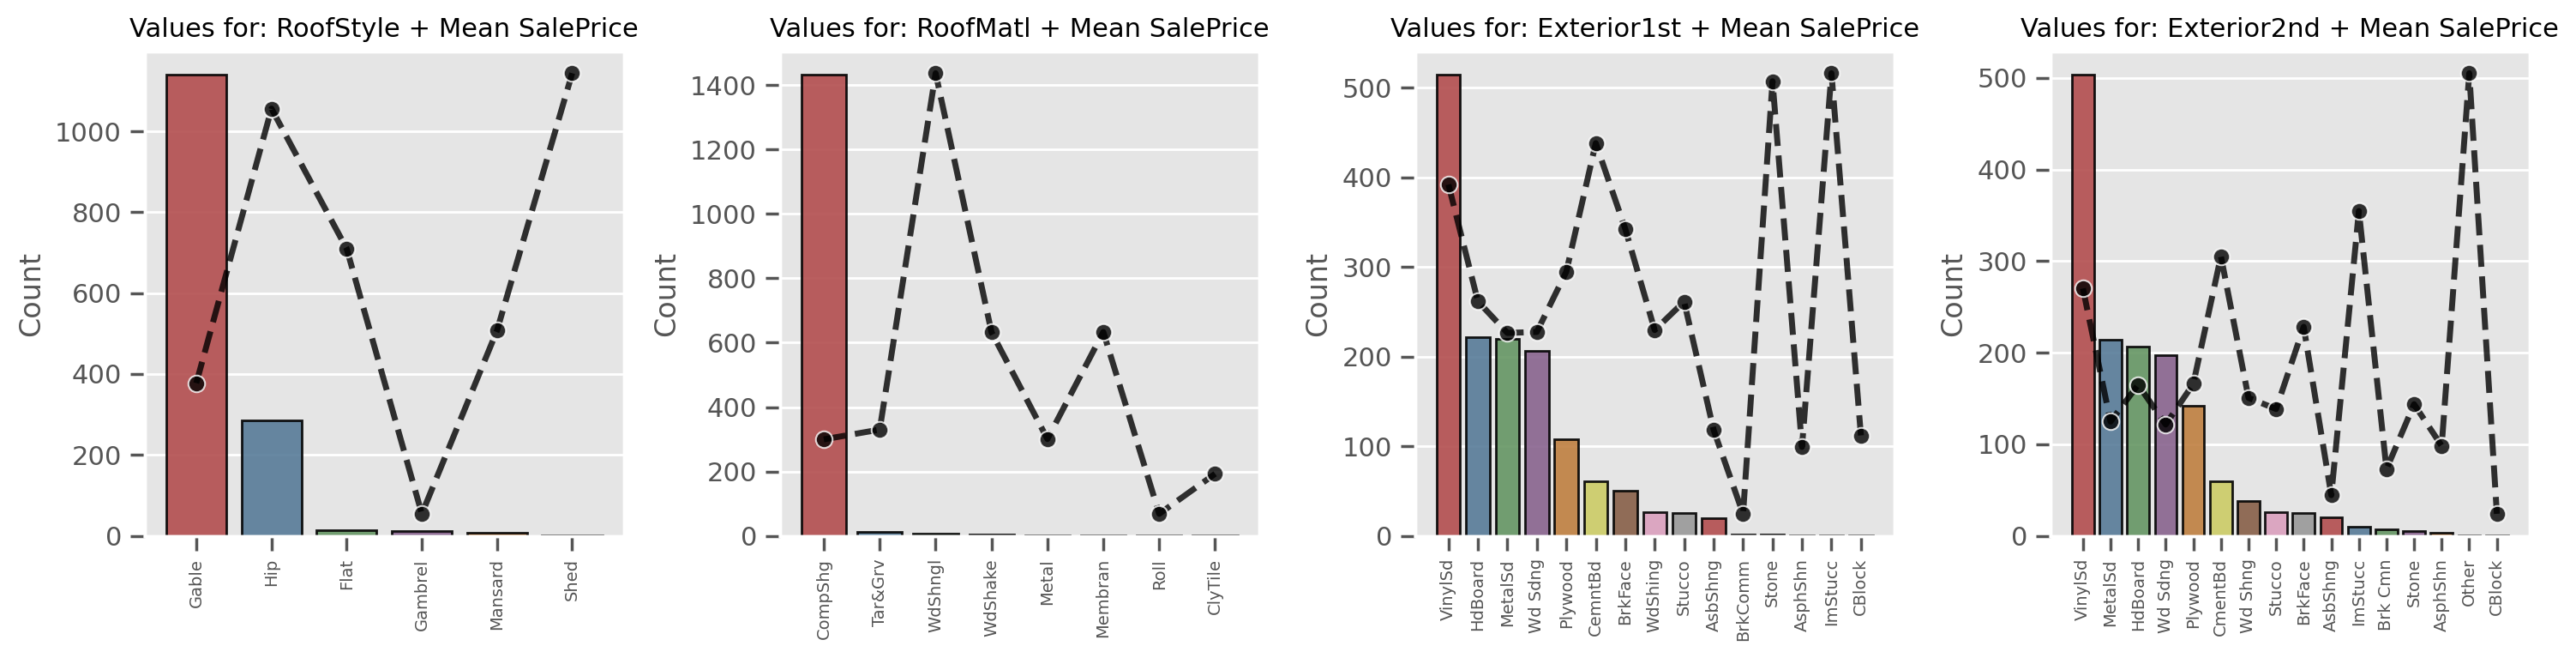

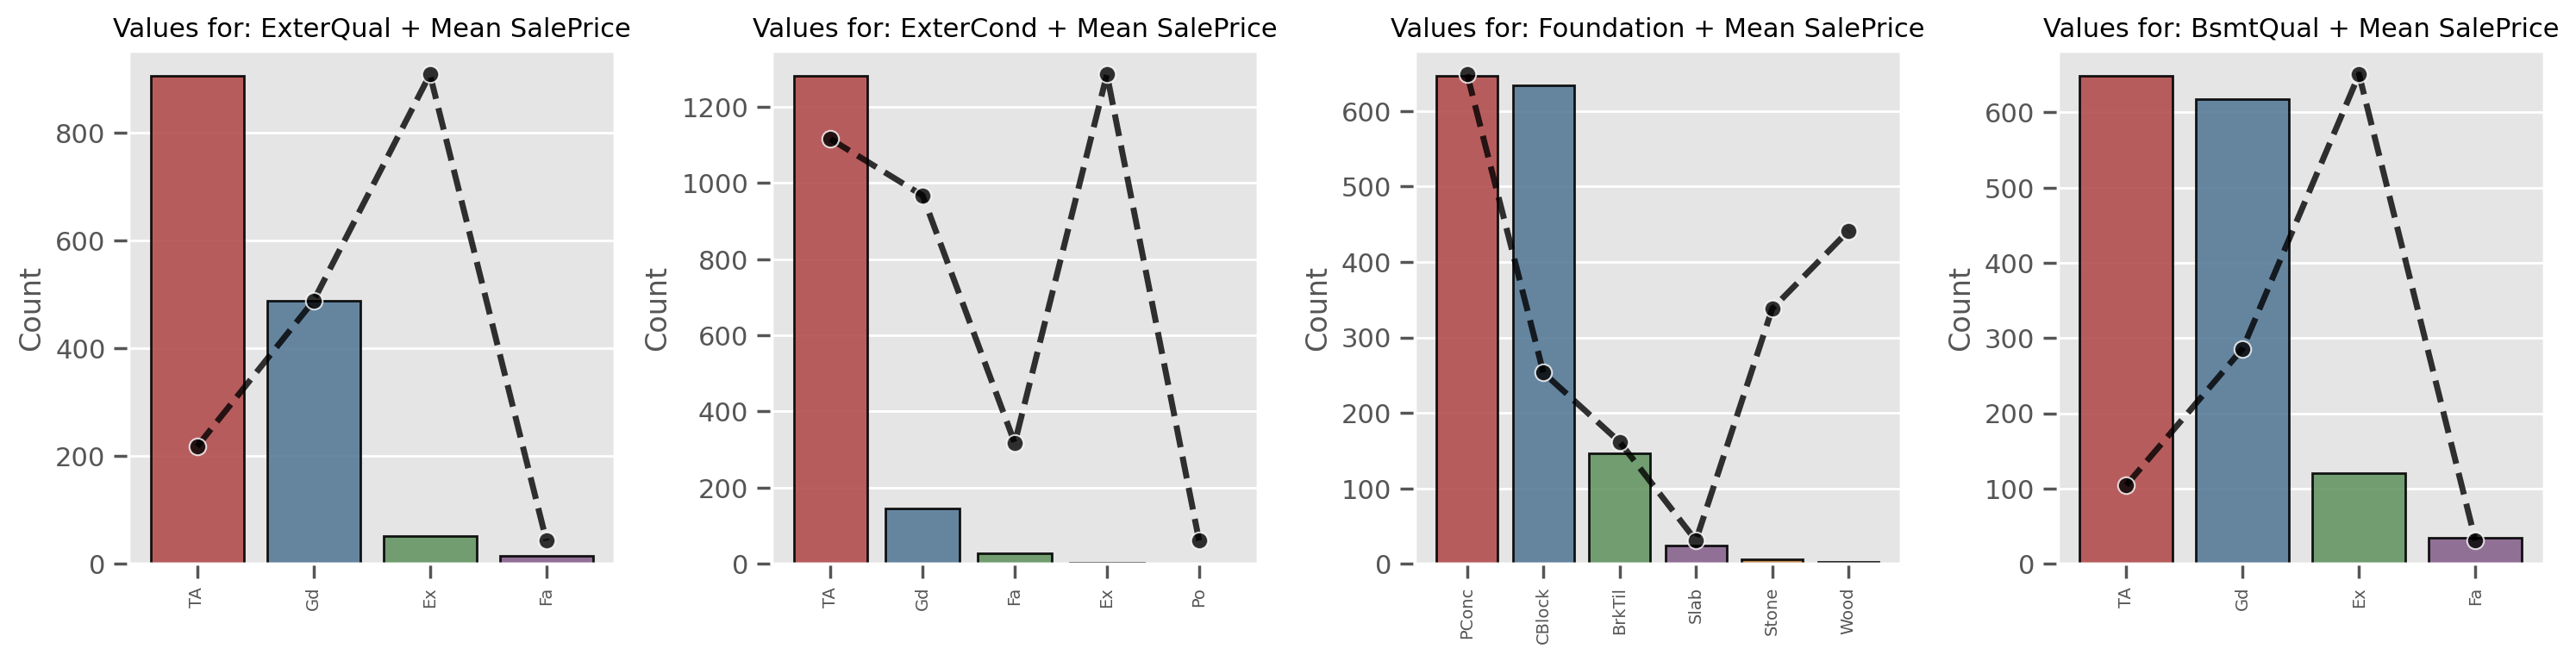

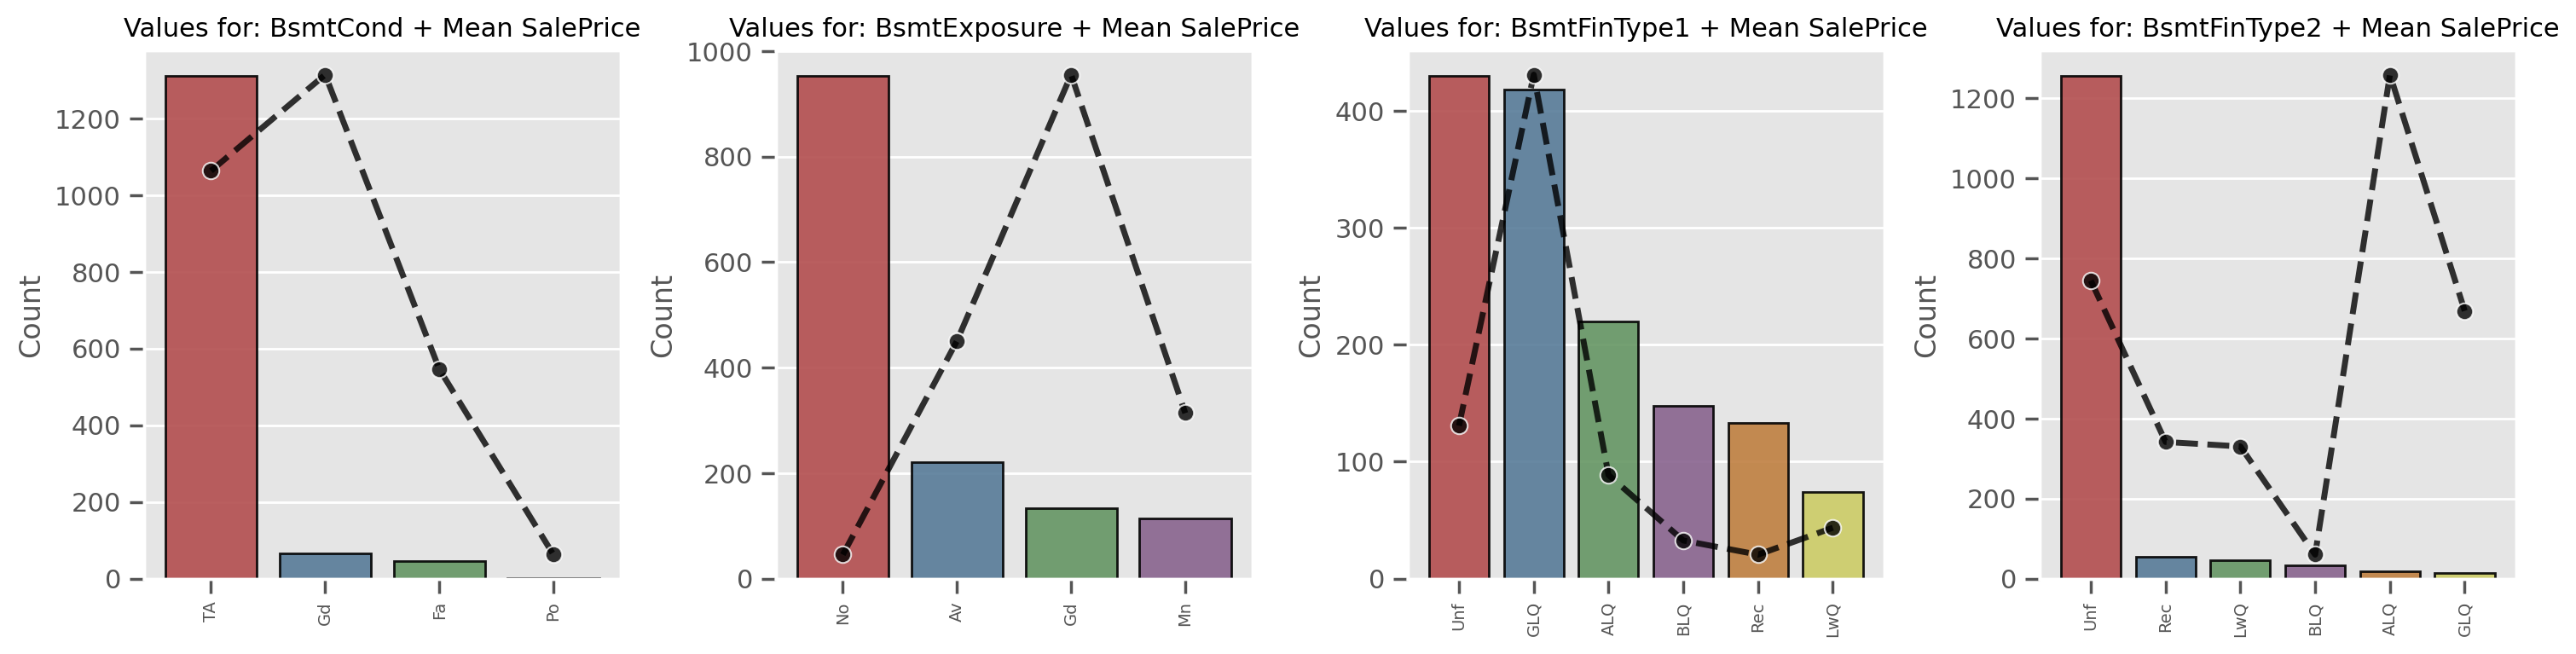

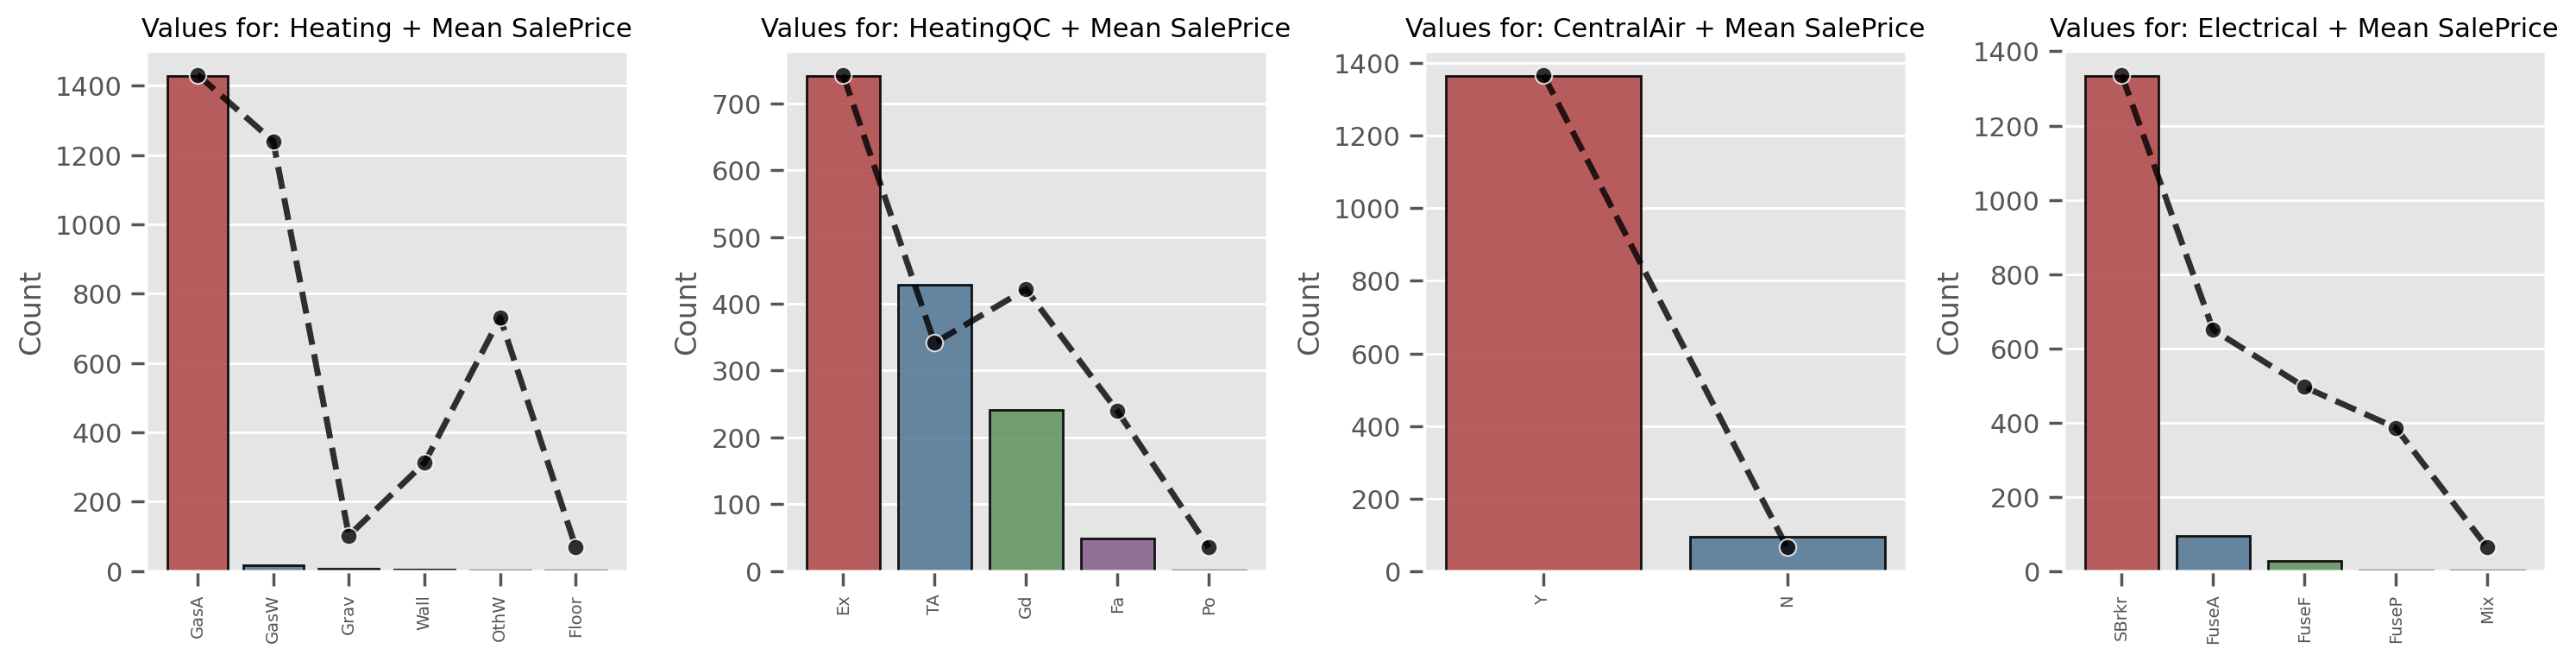

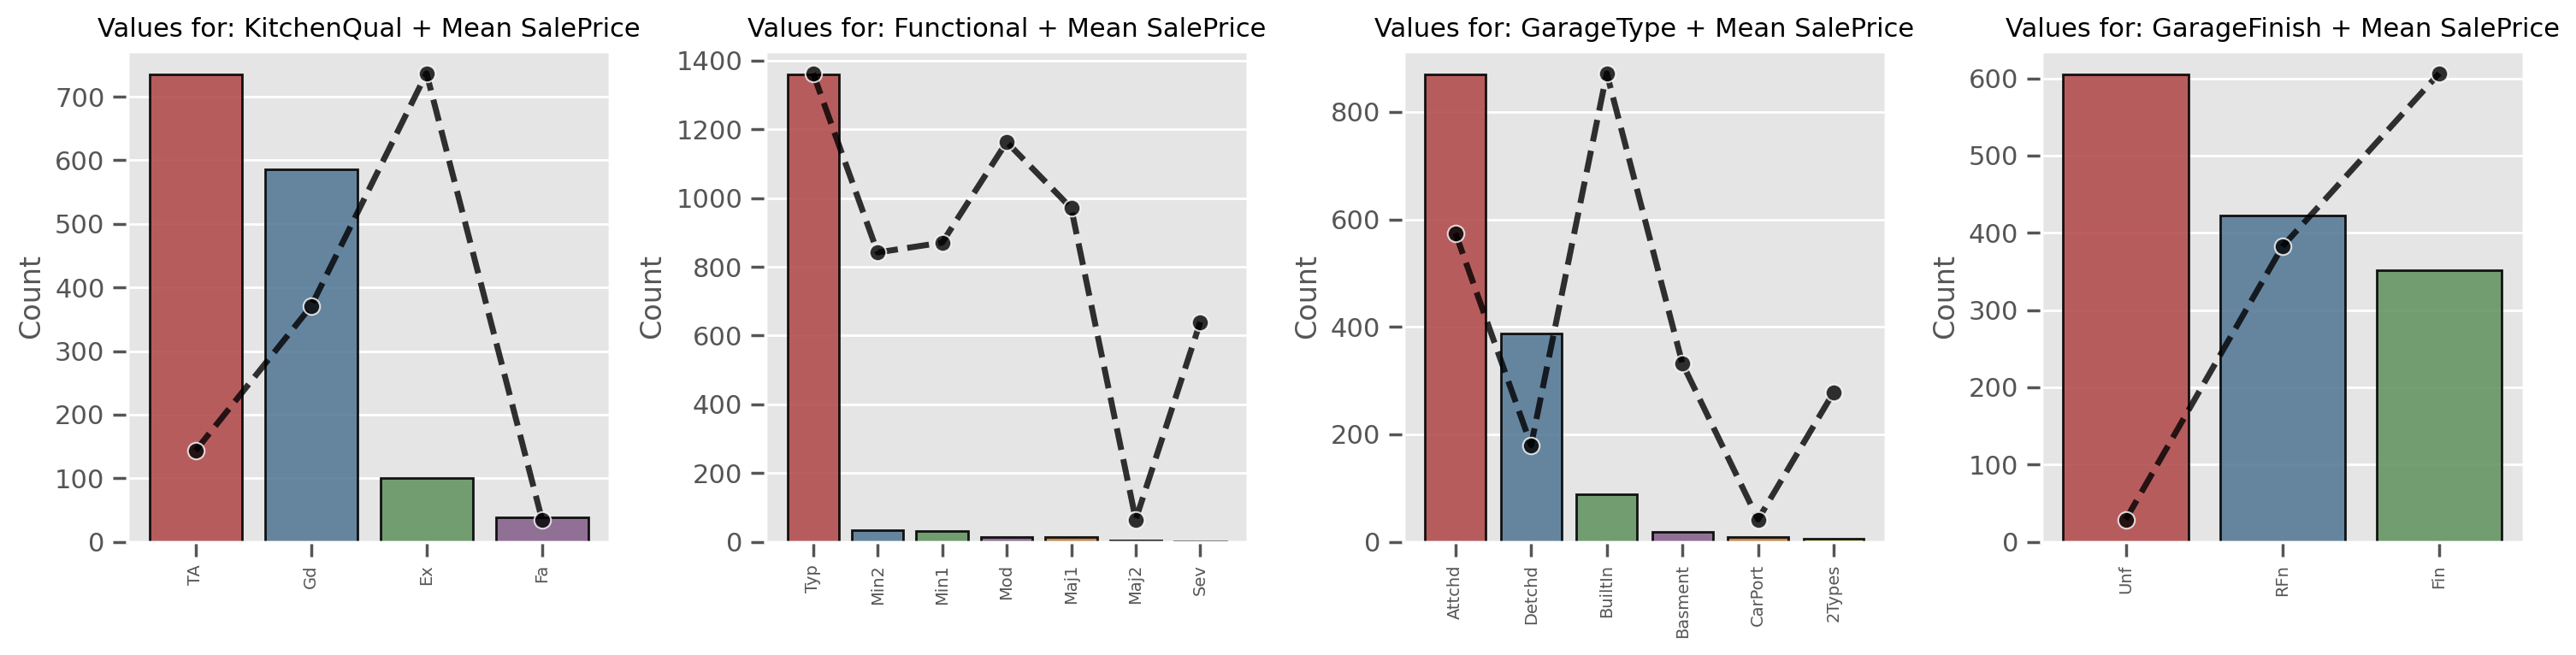

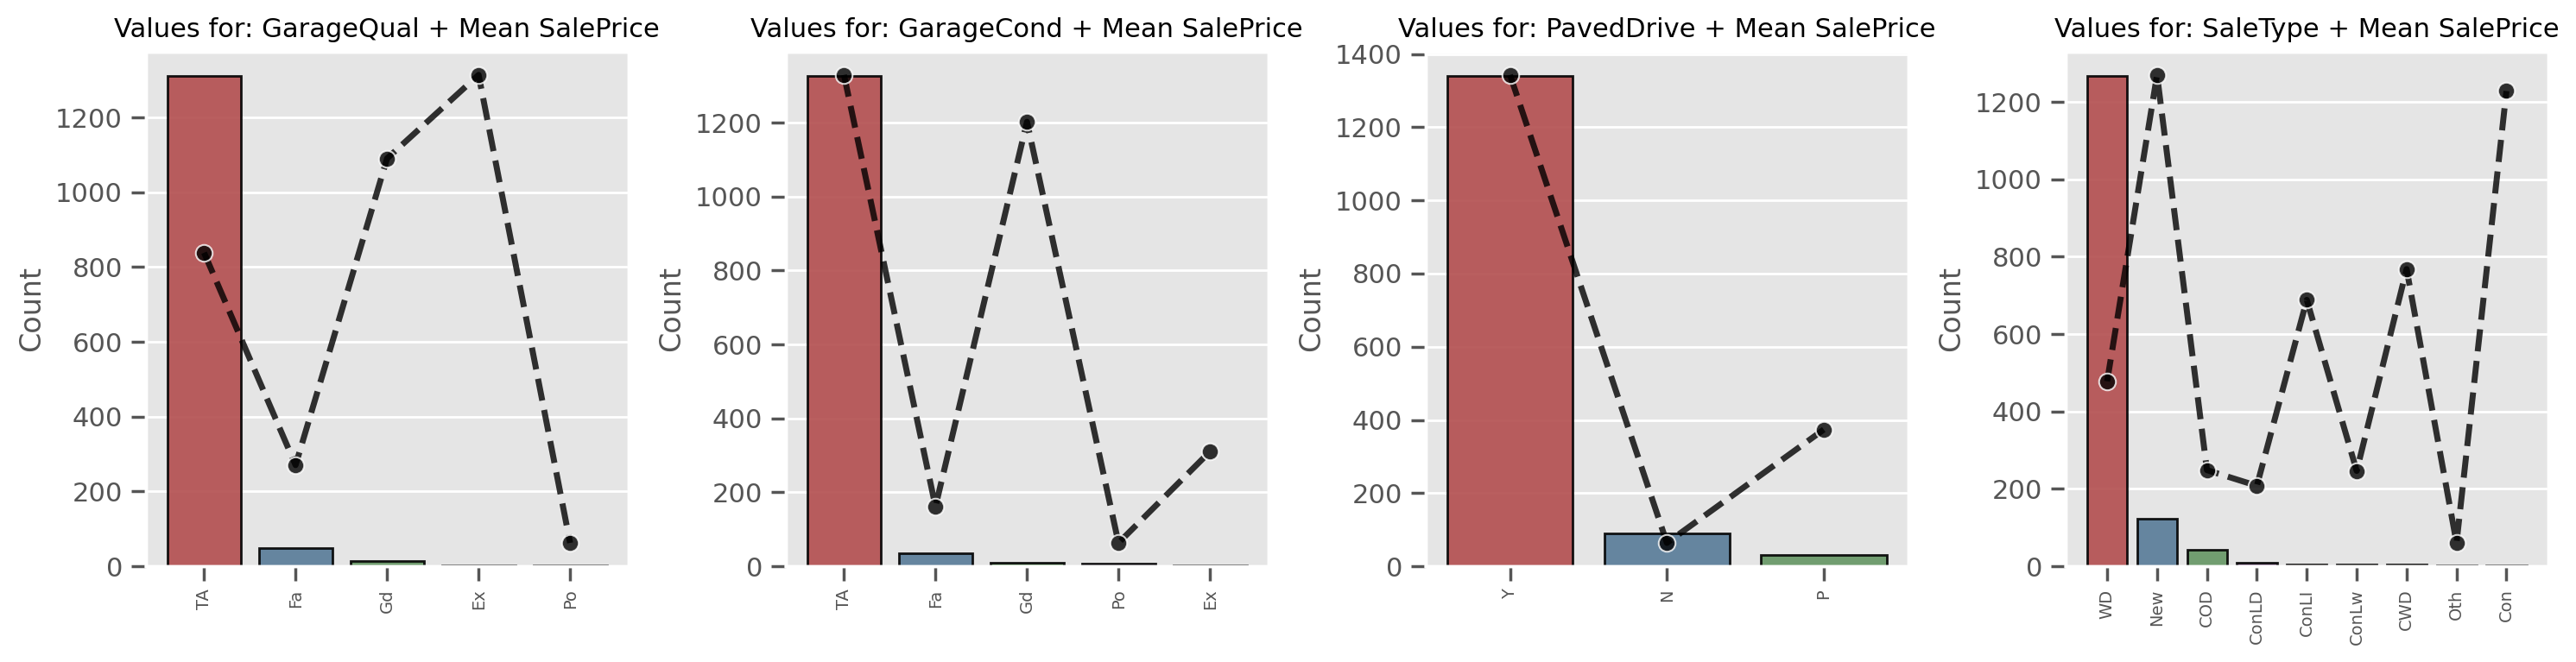

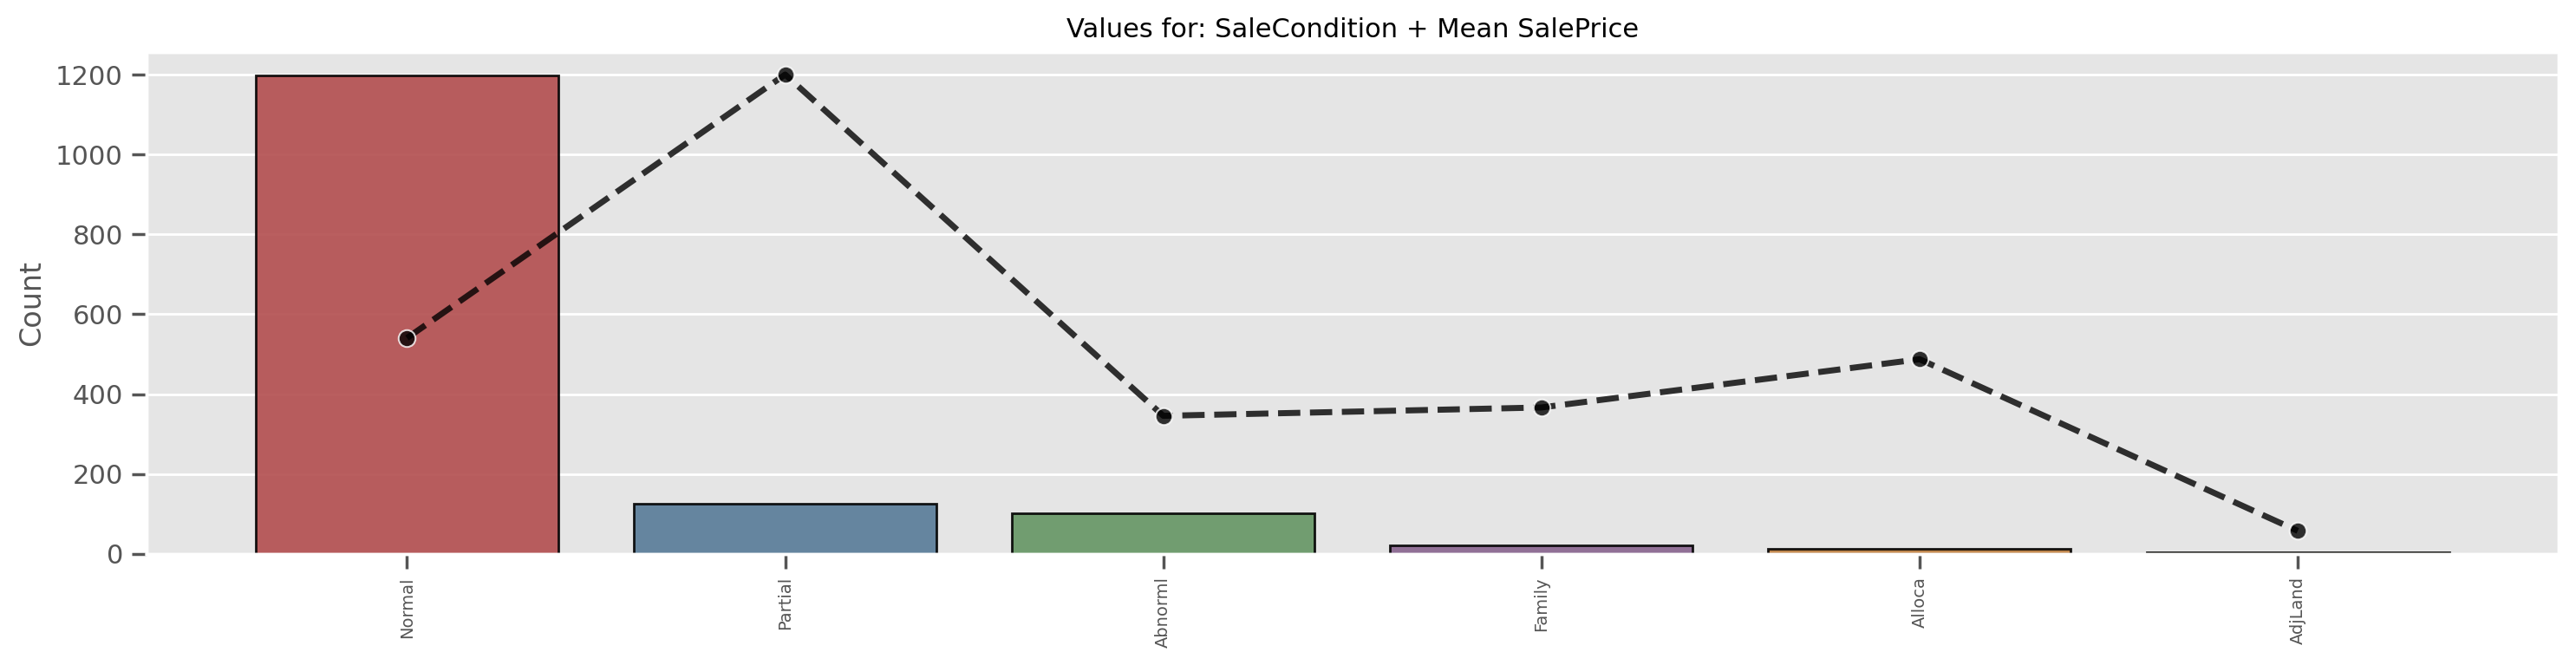

In [126]:
plots_in_sub = 4

for i in range(0, len(object_cols), plots_in_sub):
    features_in_sub = object_cols[i : i + plots_in_sub]
    fig, axes = plt.subplots(1, len(features_in_sub), figsize=(15, 4))
    
    if len(features_in_sub) == 1:
        axes = [axes]

    for ax, feature in zip(axes, features_in_sub):
        order = train_df[feature].value_counts().index
        palette = sns.color_palette('Set1')

        sns.countplot(data=train_df, x=feature, palette=palette, saturation=0.5,
                      edgecolor='.0', ax=ax, order=order, alpha=0.9)

        ax2 = ax.twinx()
        mean_df = train_df.groupby(feature)['SalePrice'].mean().reindex(order).reset_index()
        
        sns.lineplot(data=mean_df, x=feature, y='SalePrice', ax=ax2, color='black', 
                     marker='o', markersize=7, linewidth=2.5, linestyle='--', alpha=0.80)

        ax2.grid(False)
        ax2.set_ylabel('')
        ax2.set_yticks([])
        ax2.tick_params(axis='y', length=7, labelleft=False)
        
        ax.set_title(f'Values for: {feature} + Mean SalePrice', fontsize=11)
        ax.set_xlabel(''), ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=90, labelsize=7)

    plt.tight_layout()
    plt.show()

Features with no large variability: Street, LandContour, Utilities, LotConfig, LandSlope, Condition1, Condition2, BldgType, RoofStyle, RoofMatl, ExterCond, BsmtCond, BsmtExposure, BsmtFinType2, Heating, CentralAir, Functional, GarageQual, GarageCond, PavedDrive, SaleType

In [127]:
cols = train_df.shape[1]
features_to_drop = [
    'Street', 'LandContour', 'Utilities', 'LotConfig', 
    'LandSlope', 'Condition1', 'Condition2', 'BldgType', 
    'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond', 
    'BsmtExposure', 'BsmtFinType2', 'Heating', 'CentralAir', 
    'Functional', 'GarageQual', 'GarageCond', 
    'PavedDrive', 'SaleType'
    ]

train_df.drop(features_to_drop, axis=1, inplace=True)
test_df.drop(features_to_drop, axis=1, inplace=True)



object_cols = train_df.columns[train_df.dtypes == 'object']
numeric_cols = train_df.columns[(train_df.dtypes == 'int64') | (train_df.dtypes == 'float64')]
print(f'Did i Drop Columns? --> {len(object_cols) + len(numeric_cols) < cols}')

Did i Drop Columns? --> True


### <a id='toc1_3_1_'></a>[Sort by Mean Price](#toc0_)

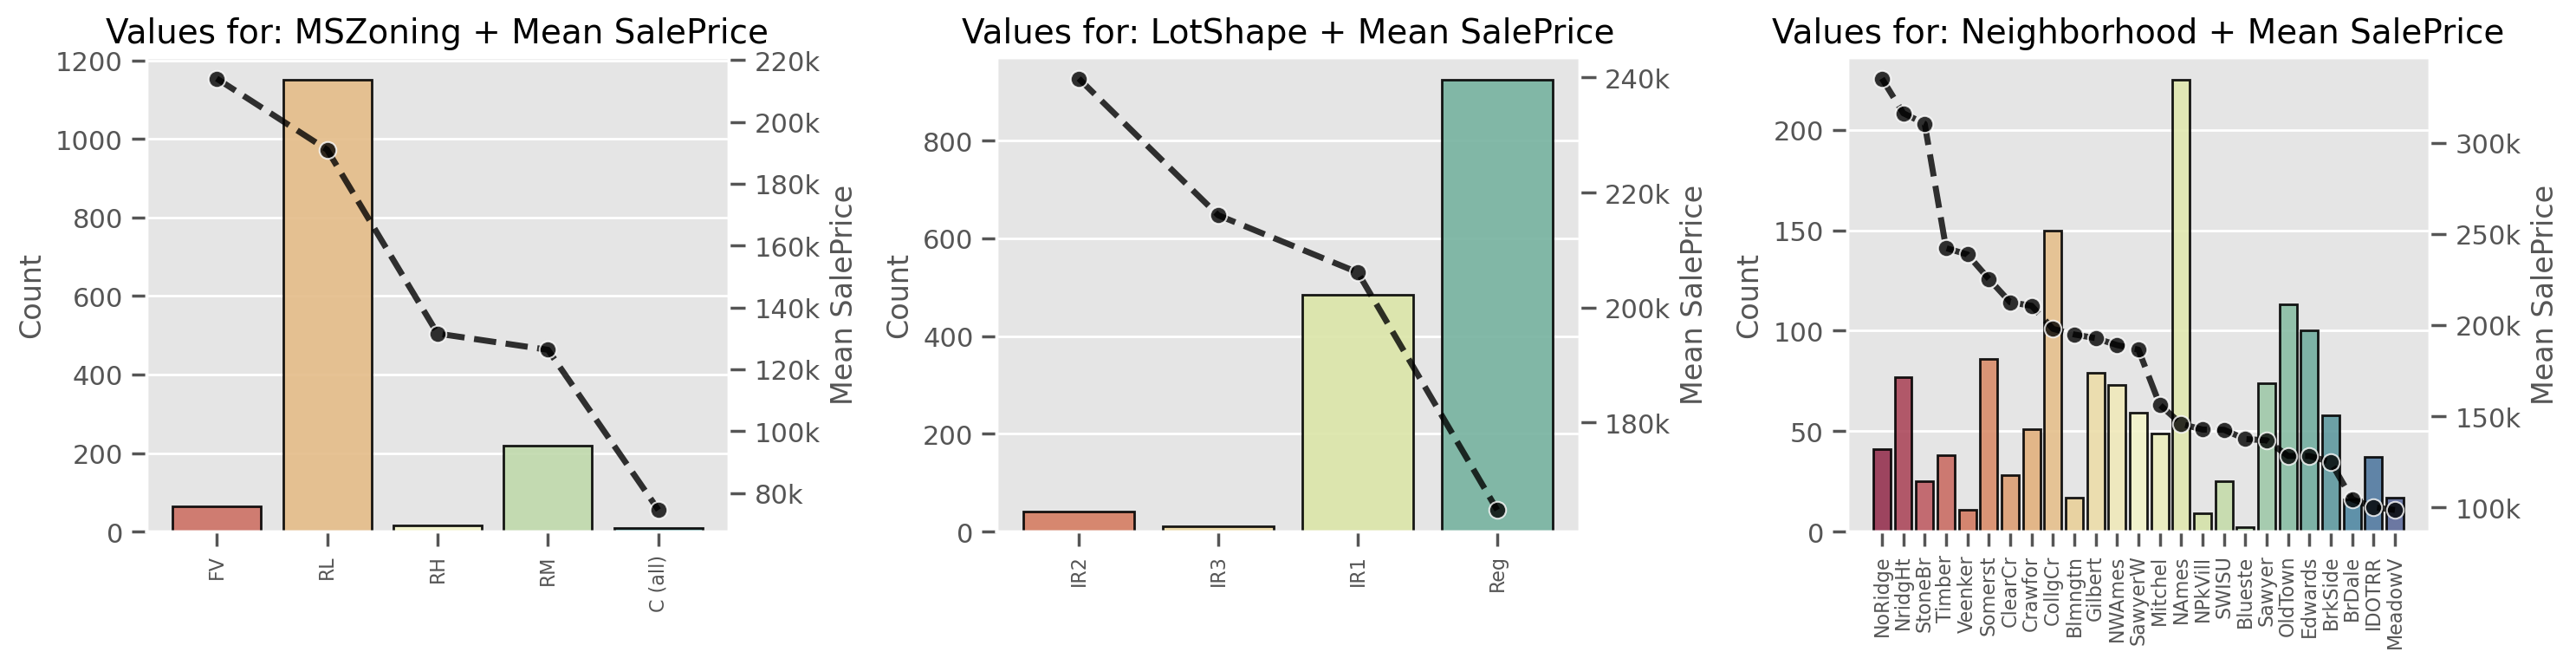

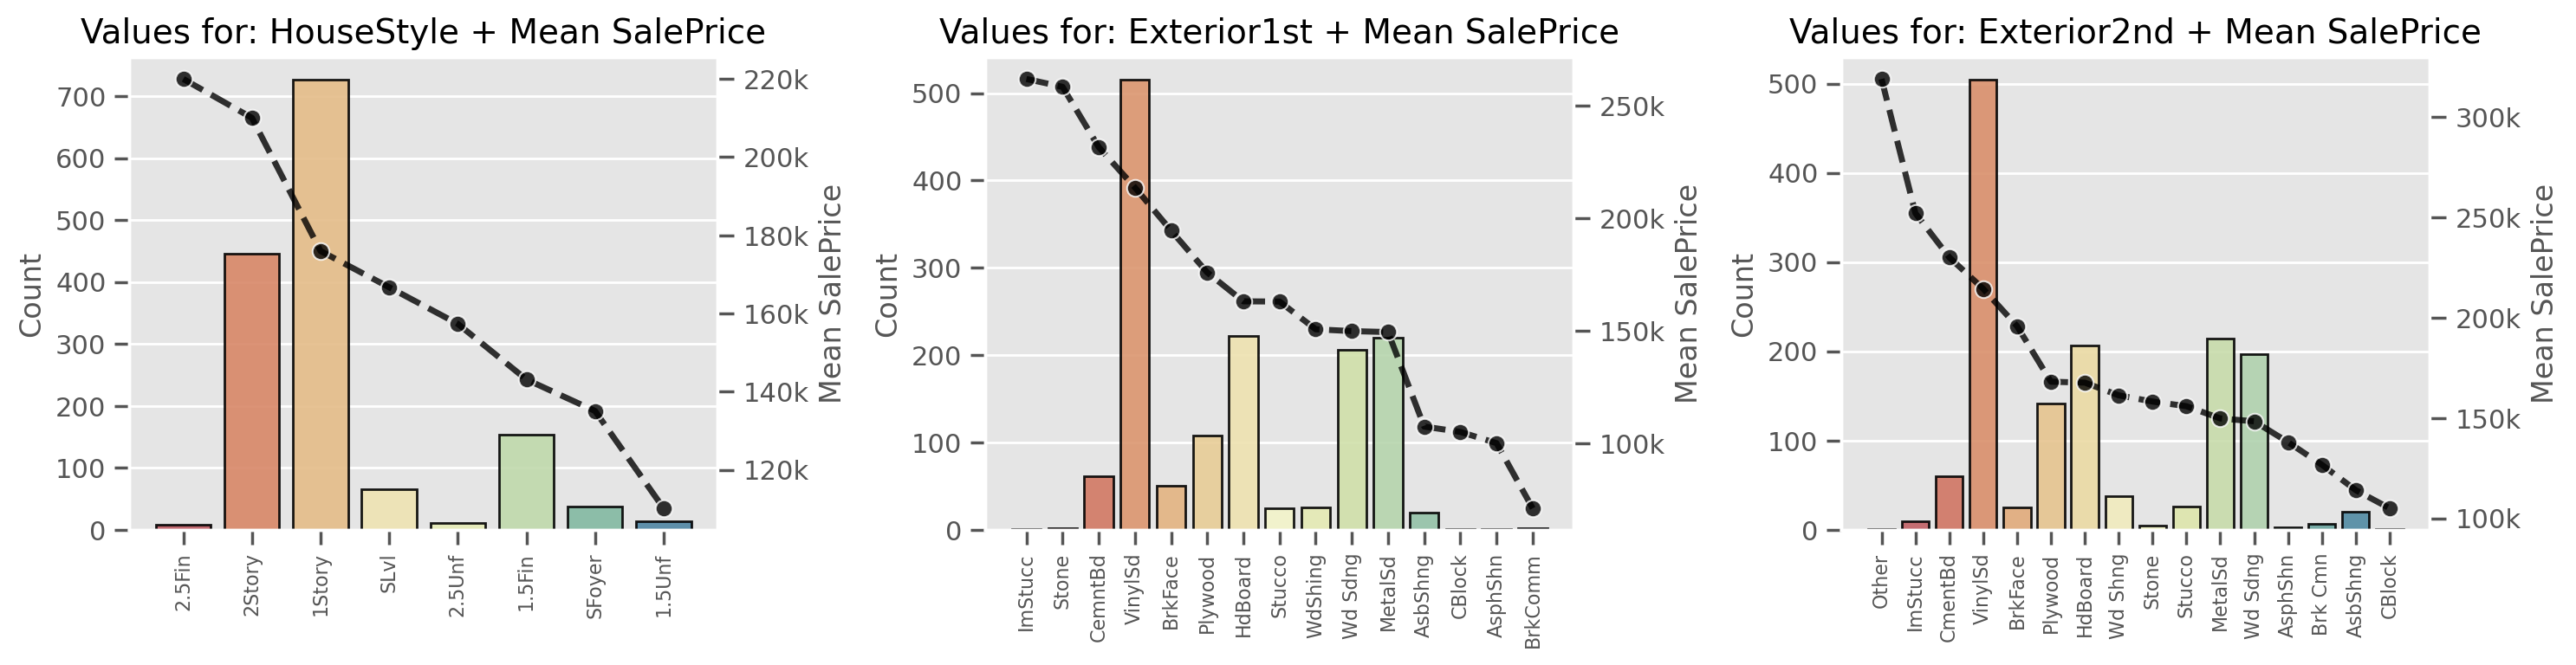

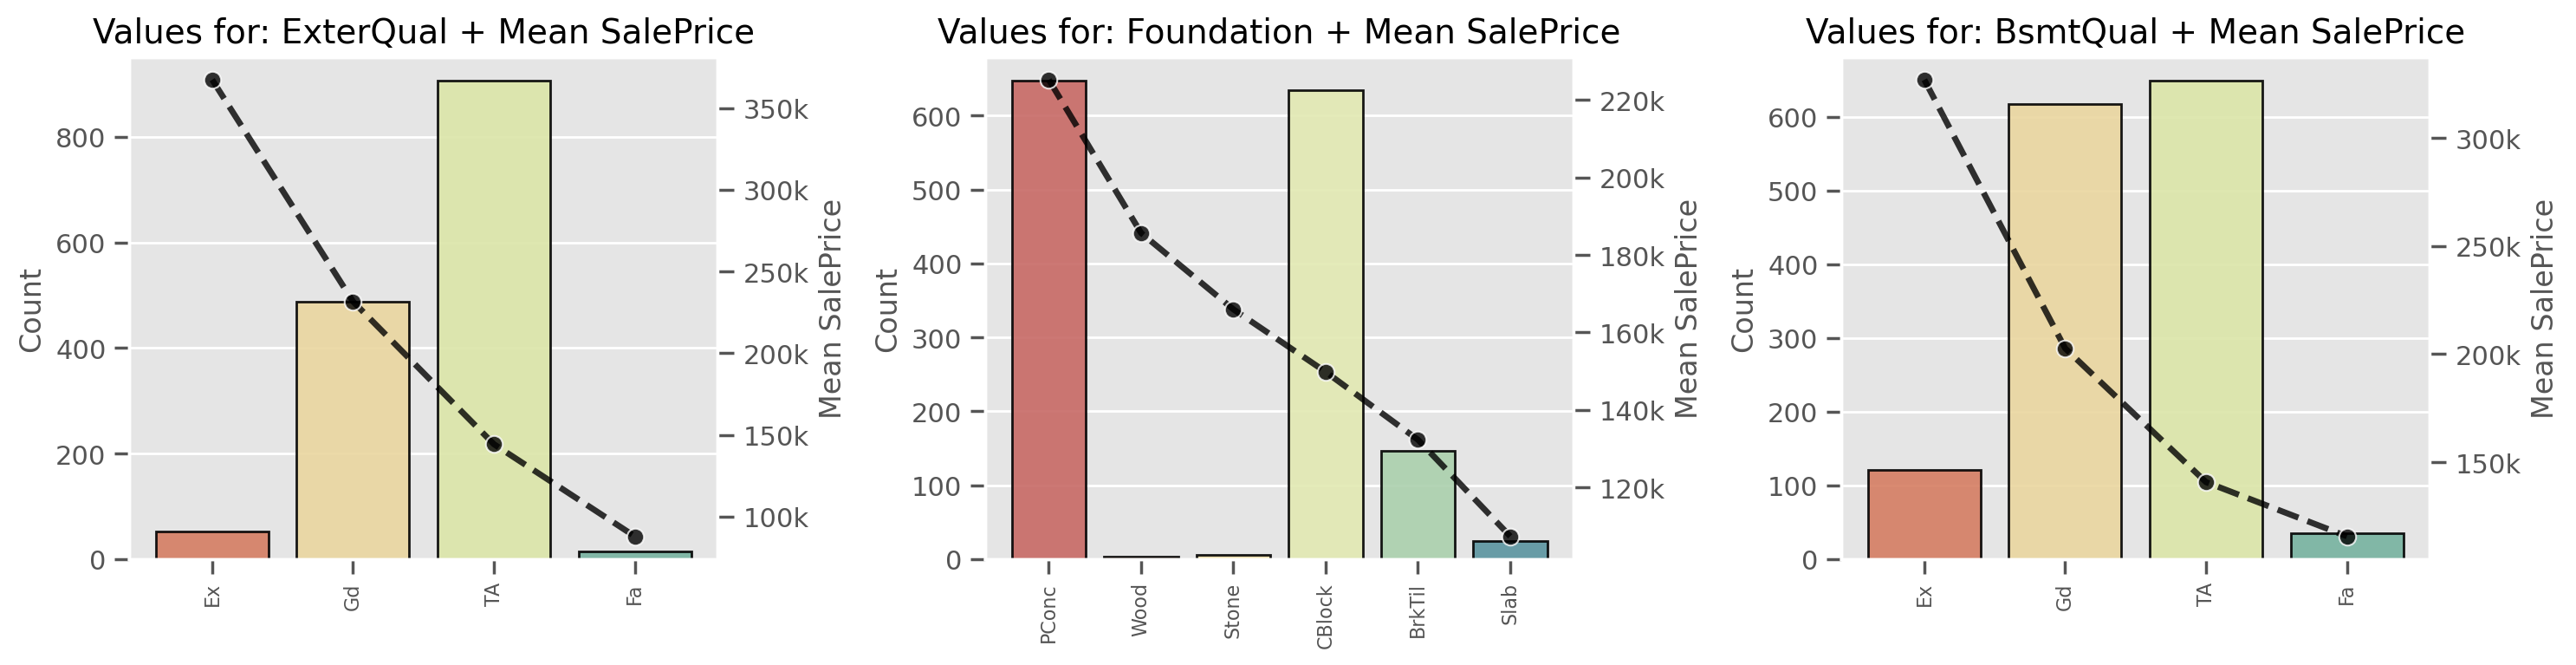

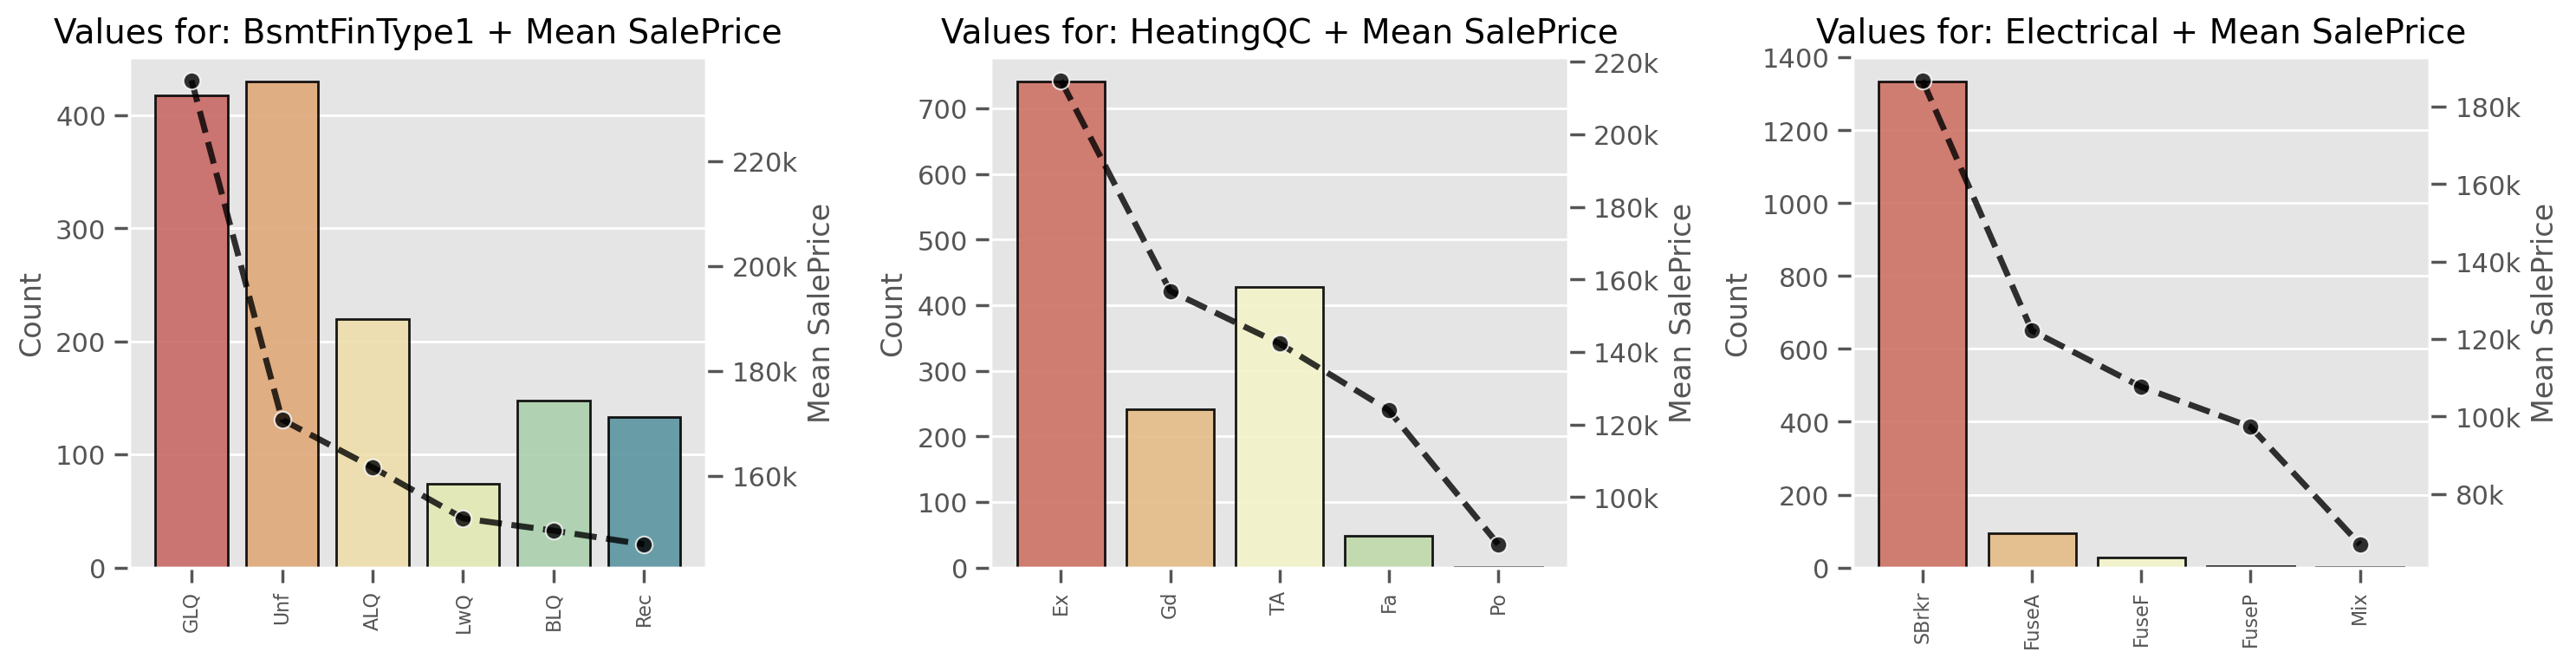

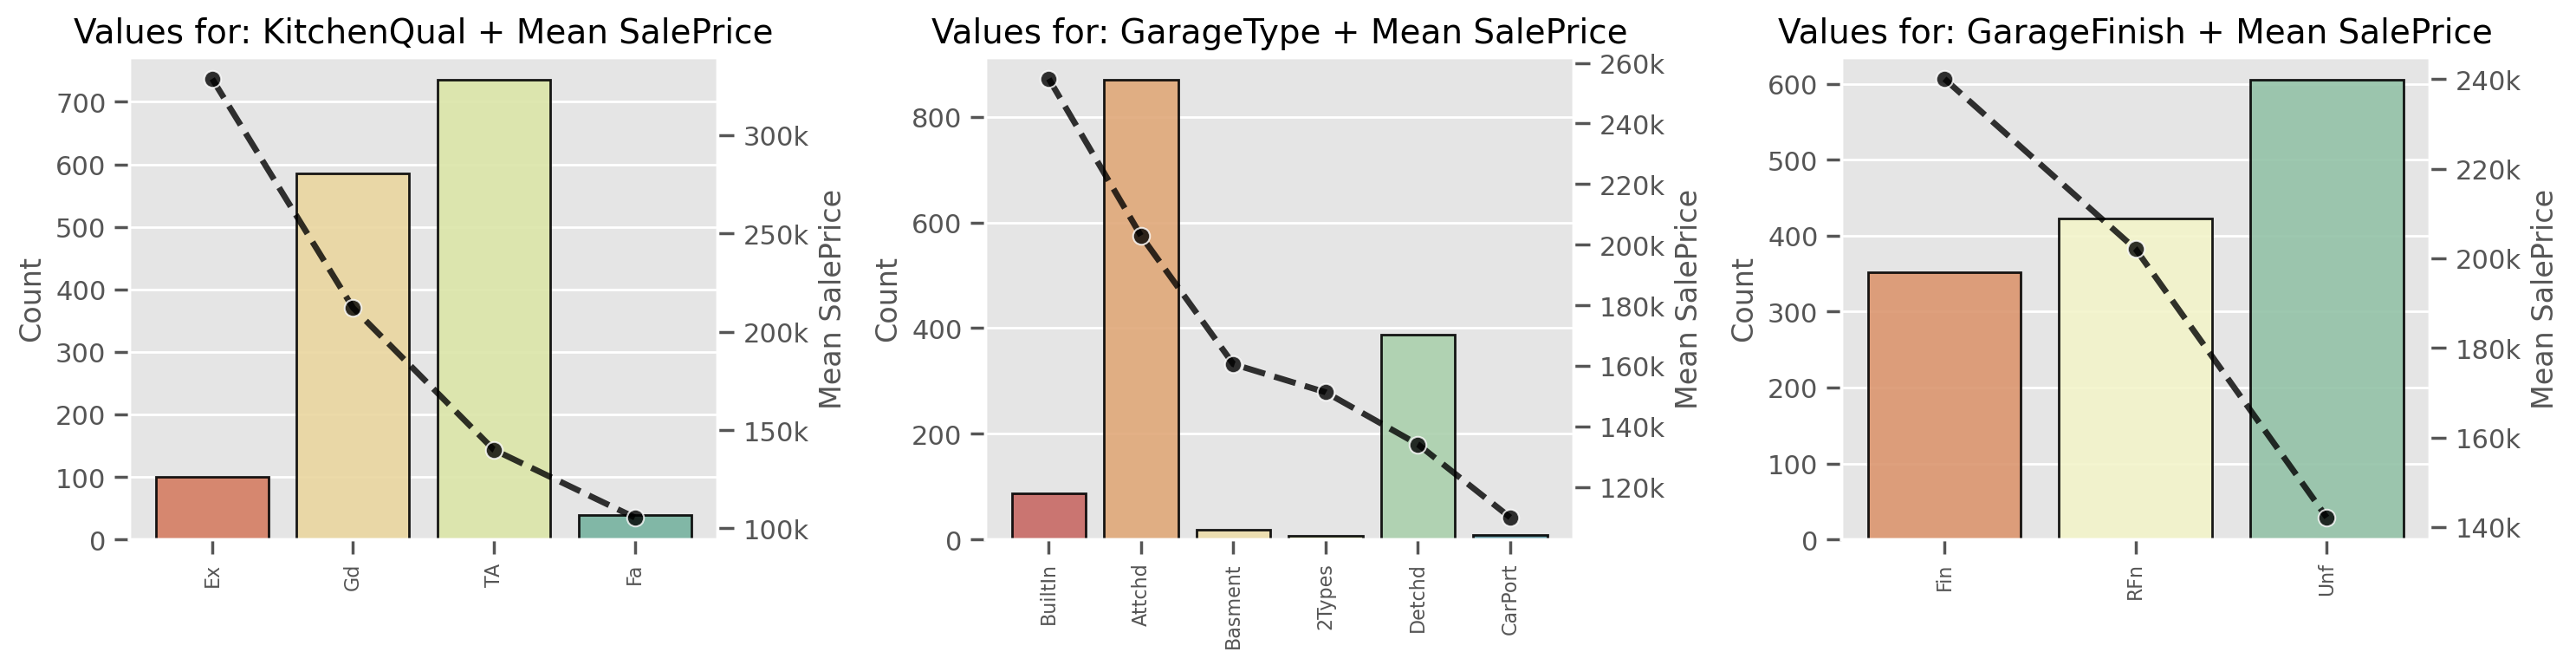

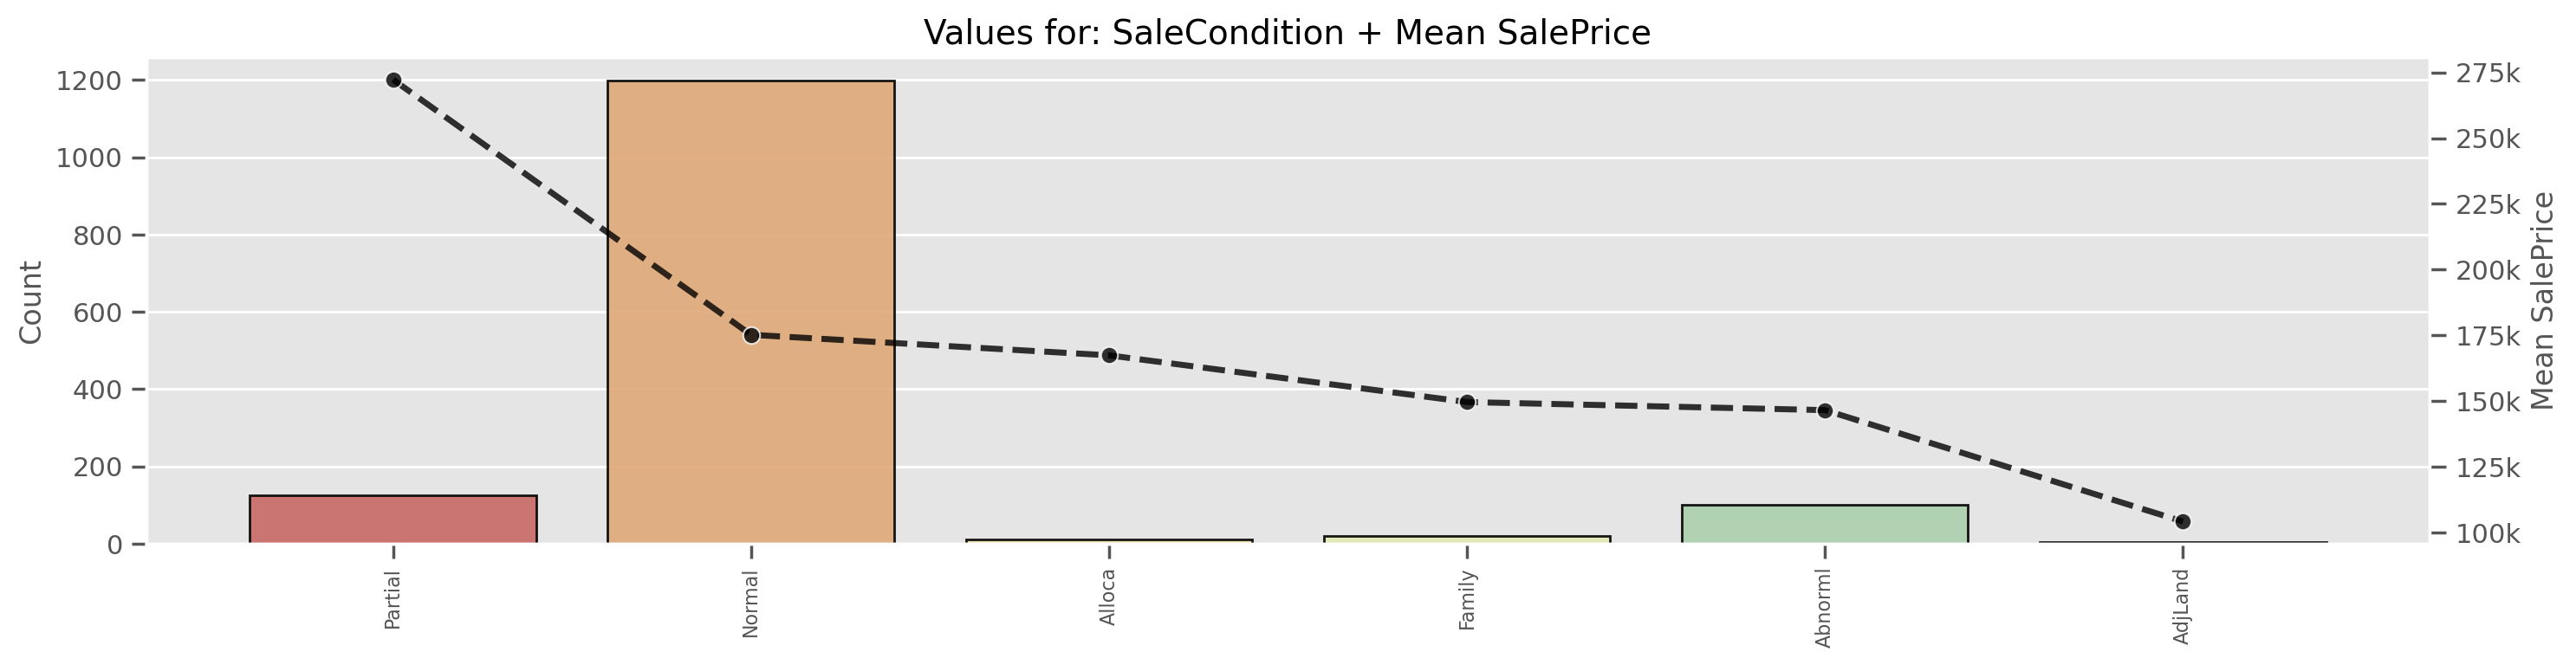

In [128]:
plots_in_sub = 3

for i in range(0, len(object_cols), plots_in_sub):
    features_in_sub = object_cols[i : i + plots_in_sub]
    fig, axes = plt.subplots(1, len(features_in_sub), figsize=(15, 4))
    
    if len(features_in_sub) == 1:
        axes = [axes]

    for ax, feature in zip(axes, features_in_sub):
        order = train_df.groupby(feature)['SalePrice'].mean().sort_values(ascending=False).index
        
        sns.countplot(data=train_df, x=feature, palette='Spectral', saturation=0.65,
                      edgecolor='.0', ax=ax, order=order, alpha=0.9)

        ax2 = ax.twinx()
        mean_df = train_df.groupby(feature)['SalePrice'].mean().reindex(order).reset_index()
        
        sns.lineplot(data=mean_df, x=feature, y='SalePrice', ax=ax2, color='black', 
                     marker='o', markersize=7, linewidth=2.5, linestyle='--', alpha=0.80)

        ax2.grid(False)
        ax2.set_ylabel('')
        ax2.set_ylabel('Mean SalePrice', fontsize=12)
        ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
        ax2.tick_params(axis='y', length=7, labelleft=False)
        
        ax.set_title(f'Values for: {feature} + Mean SalePrice', fontsize=14)
        ax.set_xlabel(''), ax.set_ylabel('Count', fontsize=12)
        ax.tick_params(axis='x', rotation=90, labelsize=8)

    plt.tight_layout()
    plt.show()

## <a id='toc1_4_'></a>[Feature Manipulation](#toc0_)

In [129]:
import textwrap

def print_columns(items, width=4):
    rows = [items[i:i+width] for i in range(0, len(items), width)]
    for row in rows:
        print(" | ".join(f"{str(item):<15}" for item in row))
        
for feature in object_cols:
    categories = train_df.groupby(feature)['SalePrice'].mean().sort_values().index.tolist()
    print(f"\n{feature} (ordered by mean SalePrice):")
    print_columns(categories, width=4)
    print("-" * 60)


MSZoning (ordered by mean SalePrice):
C (all)         | RM              | RH              | RL             
FV             
------------------------------------------------------------

LotShape (ordered by mean SalePrice):
Reg             | IR1             | IR3             | IR2            
------------------------------------------------------------

Neighborhood (ordered by mean SalePrice):
MeadowV         | IDOTRR          | BrDale          | BrkSide        
Edwards         | OldTown         | Sawyer          | Blueste        
SWISU           | NPkVill         | NAmes           | Mitchel        
SawyerW         | NWAmes          | Gilbert         | Blmngtn        
CollgCr         | Crawfor         | ClearCr         | Somerst        
Veenker         | Timber          | StoneBr         | NridgHt        
NoRidge        
------------------------------------------------------------

HouseStyle (ordered by mean SalePrice):
1.5Unf          | SFoyer          | 1.5Fin          | 2.5Unf   

### <a id='toc1_4_1_'></a>[Feature Engeneering -](#toc0_)
* **Electrical** (SBrkr, FuseA, FuseF, FuseP, Mix) $\rightarrow$ (Standard{SBrkr}, Other{FuseA, FuseF, FuseP, Mix})
* **BsmtFinType1** (GLQ, ALQ, BLQ, Rec, LwQ, Unf, NA) $\rightarrow$ (Good{GLQ}, Average{ALQ, Rec}, Low{BLQ, LwQ, Unf}, NoBsmt{NA})
* **Foundation** (BrkTil, CBlock, PConc, Slab, Wood) $\rightarrow$ (CBlock, PConc, Other{BrkTil, Slab, Wood})
* **GarageType** (2Types, Attchd, Detchd, Basment, BuiltIn, CarPort, NA) $\rightarrow$ (BuiltIn, Attached{Attchd, Basment}, Detchd, Other{2Types, CarPort}, NA)

In [130]:
# Feature Engeneering
# Electrical: ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'NA'] --> [Standard{SBrkr}, Other{FuseA, FuseF, FuseP, Mix, NA}]
train_df['Electrical'].fillna('NA', inplace=True)
train_df['BsmtFinType1'].fillna('NA', inplace=True)
train_df['GarageType'].fillna('NA', inplace=True)

test_df['Electrical'].fillna('NA', inplace=True)
test_df['BsmtFinType1'].fillna('NA', inplace=True)
test_df['GarageType'].fillna('NA', inplace=True)

In [131]:
print('Before:', '\n' + '-'*60)
print('Electrical:', train_df['Electrical'].unique().tolist())
print('BsmtFinType1:', train_df['BsmtFinType1'].unique().tolist())
print('GarageType:', train_df['GarageType'].unique().tolist())

Before: 
------------------------------------------------------------
Electrical: ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'NA']
BsmtFinType1: ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ']
GarageType: ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NA', 'Basment', '2Types']


In [132]:
# Electrical: ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'NA'] --> [Standard{SBrkr}, Other{FuseA, FuseF, FuseP, Mix, NA}]
# BsmtFinType1: [GLQ, ALQ, BLQ, Rec, LwQ, Unf, NA] --> [Good{GLQ}, Average{ALQ, Rec}, Low{BLQ, LwQ, Unf}, NA]
# Foundation [BrkTil, CBlock, PConc, Slab, Wood] --> [CBlock, PConc, Other{BrkTil, Slab, Wood, Stone}]
# GarageType [2Types, Attchd, Detchd, Basment, BuiltIn, CarPort, NA] --> [BuiltIn, Attached{Attchd, Basment}, Detchd, Other{2Types, CarPort}, NA]

electrical_map = {
    'SBrkr': 'Standard', 
    'FuseF': 'Other', 
    'FuseA': 'Other', 
    'FuseP': 'Other', 
    'Mix': 'Other', 
}
bsmt_type_map = {
    'GLQ': 'Good', 
    'ALQ': 'Average', 
    'BLQ': 'Low', 
    'Rec': 'Average', 
    'LwQ': 'Low', 
    'Unf': 'Low'
}
foundation_map = {
    'BrkTil': 'Other', 
    'Slab': 'Other', 
    'Wood': 'Other',
    'Stone': 'Other'
}
garage_type_map = {
    '2Types': 'Other', 
    'Attchd': 'Attached', 
    'Detchd':'Detached', 
    'Basment': 'Attached',
    'CarPort': 'Other'
}

train_df['Electrical'].replace(electrical_map, inplace=True)
train_df['BsmtFinType1'].replace(bsmt_type_map, inplace=True)
train_df['Foundation'].replace(foundation_map, inplace=True)
train_df['GarageType'].replace(garage_type_map, inplace=True)

test_df['Electrical'].replace(electrical_map, inplace=True)
test_df['BsmtFinType1'].replace(bsmt_type_map, inplace=True)
test_df['Foundation'].replace(foundation_map, inplace=True)
test_df['GarageType'].replace(garage_type_map, inplace=True)

In [133]:
print('After Feature Engineering:', '\n' + '-'*35)
print('Electrical:', train_df['Electrical'].unique().tolist())
print('BsmtFinType1:', train_df['BsmtFinType1'].unique().tolist())
print('Foundation:', train_df['Foundation'].unique().tolist())
print('GarageType:', train_df['GarageType'].unique().tolist())

After Feature Engineering: 
-----------------------------------
Electrical: ['Standard', 'Other', 'NA']
BsmtFinType1: ['Good', 'Average', 'Low', 'NA']
Foundation: ['PConc', 'CBlock', 'Other']
GarageType: ['Attached', 'Detached', 'BuiltIn', 'Other', 'NA']


### <a id='toc1_4_2_'></a>[Label Encoding -](#toc0_)
* **ExterQual, BsmtQual, HeatingQC, KitchenQual** $\rightarrow$ Fa{Po + Fa}, TA, Gd, Ex $\rightarrow$ (0-4)
* **GarageFinish** (NA, Unf, RFn, Fin) $\rightarrow$ (0-3)
* **Electrical** (Standard, Other, NA) $\rightarrow$ (0-2)
* **BsmtFinType1**: (Good, Average, Low, NA) $\rightarrow$ (0-3)

In [134]:
train_df['GarageFinish'].fillna('NA', inplace=True)
test_df['GarageFinish'].fillna('NA', inplace=True)

for qual_feature in ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']:
    train_df[qual_feature].fillna('NA', inplace=True)
    test_df[qual_feature].fillna('NA', inplace=True)
    
qual_df = train_df[['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']]
print(f'Did if fill the nulls --> {qual_df.isna().sum().sum() + train_df.GarageFinish.isna().sum().sum() == 0}')

Did if fill the nulls --> True


In [135]:
electrical_map = {'Standard': 2, 'Other': 1, 'NA': 0}
bsmt_type_map = {'Good': 3, 'Average': 2, 'Low': 1, 'NA': 0}
qual_map = {'NA': 0, 'Po': 1, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
garage_fnsh_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}

train_df['Electrical'].replace(electrical_map, inplace=True)
train_df['BsmtFinType1'].replace(bsmt_type_map, inplace=True)
train_df['GarageFinish'].replace(garage_fnsh_map, inplace=True)

test_df['Electrical'].replace(electrical_map, inplace=True)
test_df['BsmtFinType1'].replace(bsmt_type_map, inplace=True)
test_df['GarageFinish'].replace(garage_fnsh_map, inplace=True)

for col in ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']:
    train_df[col].replace(qual_map, inplace=True)
    test_df[col].replace(qual_map, inplace=True)

In [136]:
label_encoding_cols = ['Electrical', 'BsmtFinType1', 'GarageFinish', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']
for col in label_encoding_cols:
    print(f"{col} - unique values: {sorted(train_df[col].unique())}")

Electrical - unique values: [np.int64(0), np.int64(1), np.int64(2)]
BsmtFinType1 - unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
GarageFinish - unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
ExterQual - unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
BsmtQual - unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
HeatingQC - unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
KitchenQual - unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


### <a id='toc1_4_3_'></a>[Target Encoding (LOO) -](#toc0_)
* **MSZoning, LotShape, Neighborhood, HouseStyle, Exterior1st, Exterior2nd, SaleCondition**

In [137]:
leave_one_out_cols = [
    'MSZoning', 'LotShape', 'Neighborhood', 
    'HouseStyle', 'Exterior1st', 'Exterior2nd', 
    'SaleCondition', 'Foundation', 'GarageType'
]

In [138]:
train_df[leave_one_out_cols].head()

MSZoning LotShape Neighborhood HouseStyle Exterior1st Exterior2nd  \
0       RL      Reg      CollgCr     2Story     VinylSd     VinylSd   
1       RL      Reg      Veenker     1Story     MetalSd     MetalSd   
2       RL      IR1      CollgCr     2Story     VinylSd     VinylSd   
3       RL      IR1      Crawfor     2Story     Wd Sdng     Wd Shng   
4       RL      IR1      NoRidge     2Story     VinylSd     VinylSd   

  SaleCondition Foundation GarageType  
0        Normal      PConc   Attached  
1        Normal     CBlock   Attached  
2        Normal      PConc   Attached  
3       Abnorml      Other   Detached  
4        Normal      PConc   Attached

In [139]:
train_df[leave_one_out_cols].isna().sum(axis=0)

MSZoning         0
LotShape         0
Neighborhood     0
HouseStyle       0
Exterior1st      0
Exterior2nd      0
SaleCondition    0
Foundation       0
GarageType       0
dtype: int64

In [140]:
# amount of unique categories before for each feature
print('Number of Categories Within each Feature' + '\n' + '-'*40)
for col in leave_one_out_cols:
    feature = col
    unique_categories = train_df[col].nunique()
    print(f'| {feature}: {unique_categories}')

Number of Categories Within each Feature
----------------------------------------
| MSZoning: 5
| LotShape: 4
| Neighborhood: 25
| HouseStyle: 8
| Exterior1st: 15
| Exterior2nd: 16
| SaleCondition: 6
| Foundation: 3
| GarageType: 5


In [141]:
from sklearn.preprocessing import TargetEncoder

target_enc = TargetEncoder(target_type='continuous', cv=train_df.shape[0], shuffle=False)
target_enc.fit(train_df[leave_one_out_cols], train_df['SalePrice'])

train_df[leave_one_out_cols] = target_enc.transform(train_df[leave_one_out_cols])
test_df[leave_one_out_cols] = target_enc.transform(test_df[leave_one_out_cols])

In [142]:
# nunique after
print('Number of Categories Within each Feature' + '\n' + '-'*40)
for col in leave_one_out_cols:
    feature = col
    unique_categories = train_df[col].nunique()
    print(f'| {feature}: {unique_categories}')

Number of Categories Within each Feature
----------------------------------------
| MSZoning: 5
| LotShape: 4
| Neighborhood: 25
| HouseStyle: 8
| Exterior1st: 15
| Exterior2nd: 16
| SaleCondition: 6
| Foundation: 3
| GarageType: 5


In [143]:
train_df[leave_one_out_cols].dtypes.to_frame().T

MSZoning LotShape Neighborhood HouseStyle Exterior1st Exterior2nd  \
0  float64  float64      float64    float64     float64     float64   

  SaleCondition Foundation GarageType  
0       float64    float64    float64

In [144]:
cond = sum((train_df.dtypes.values == 'object').tolist()) == 0
print(f'Are all columns numeric? --> {cond}')

Are all columns numeric? --> True


## <a id='toc1_5_'></a>[Explore Numerical Features](#toc0_)

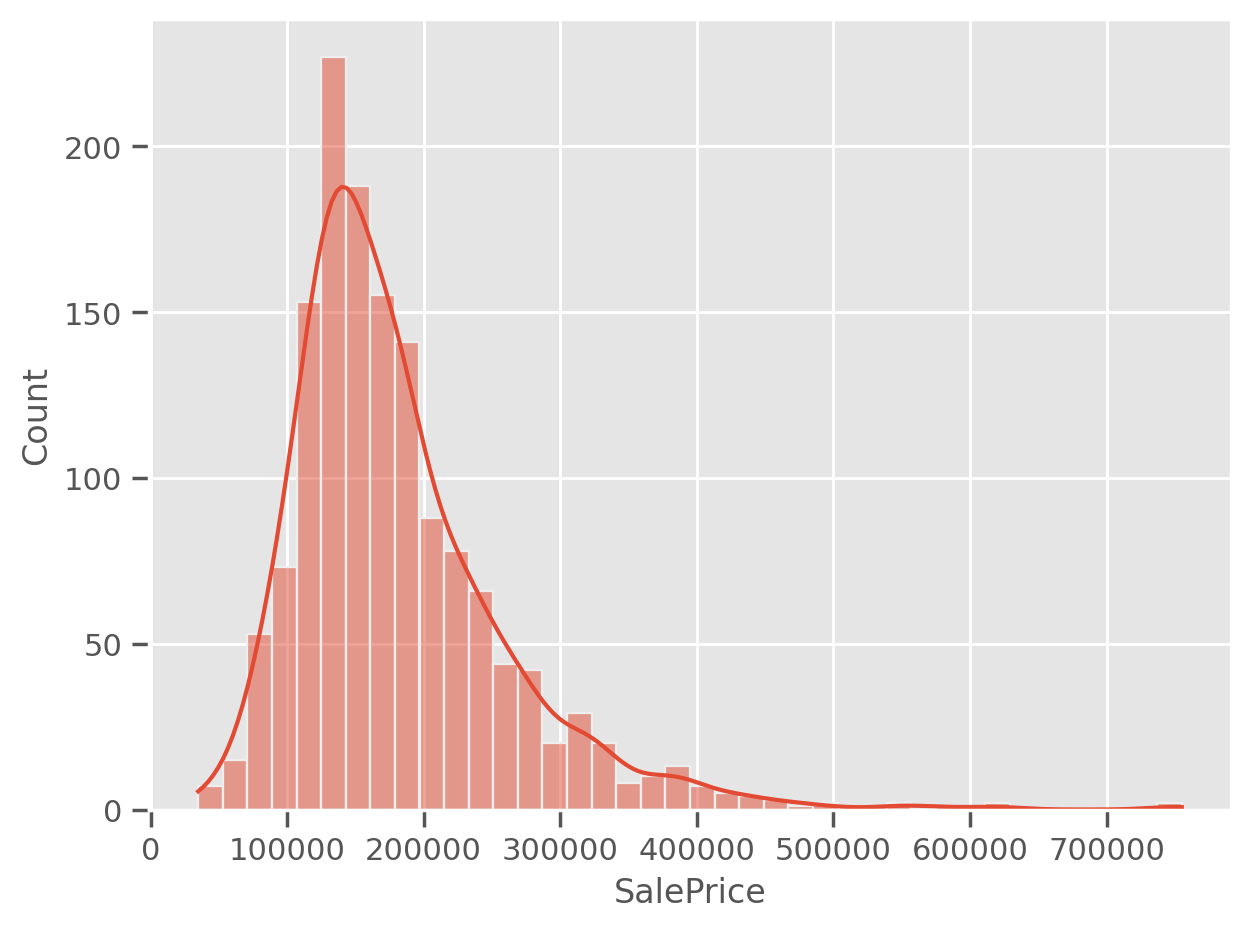

In [145]:
sns.histplot(x=train_df['SalePrice'], kde=True, bins=40)
plt.tight_layout()
plt.show()

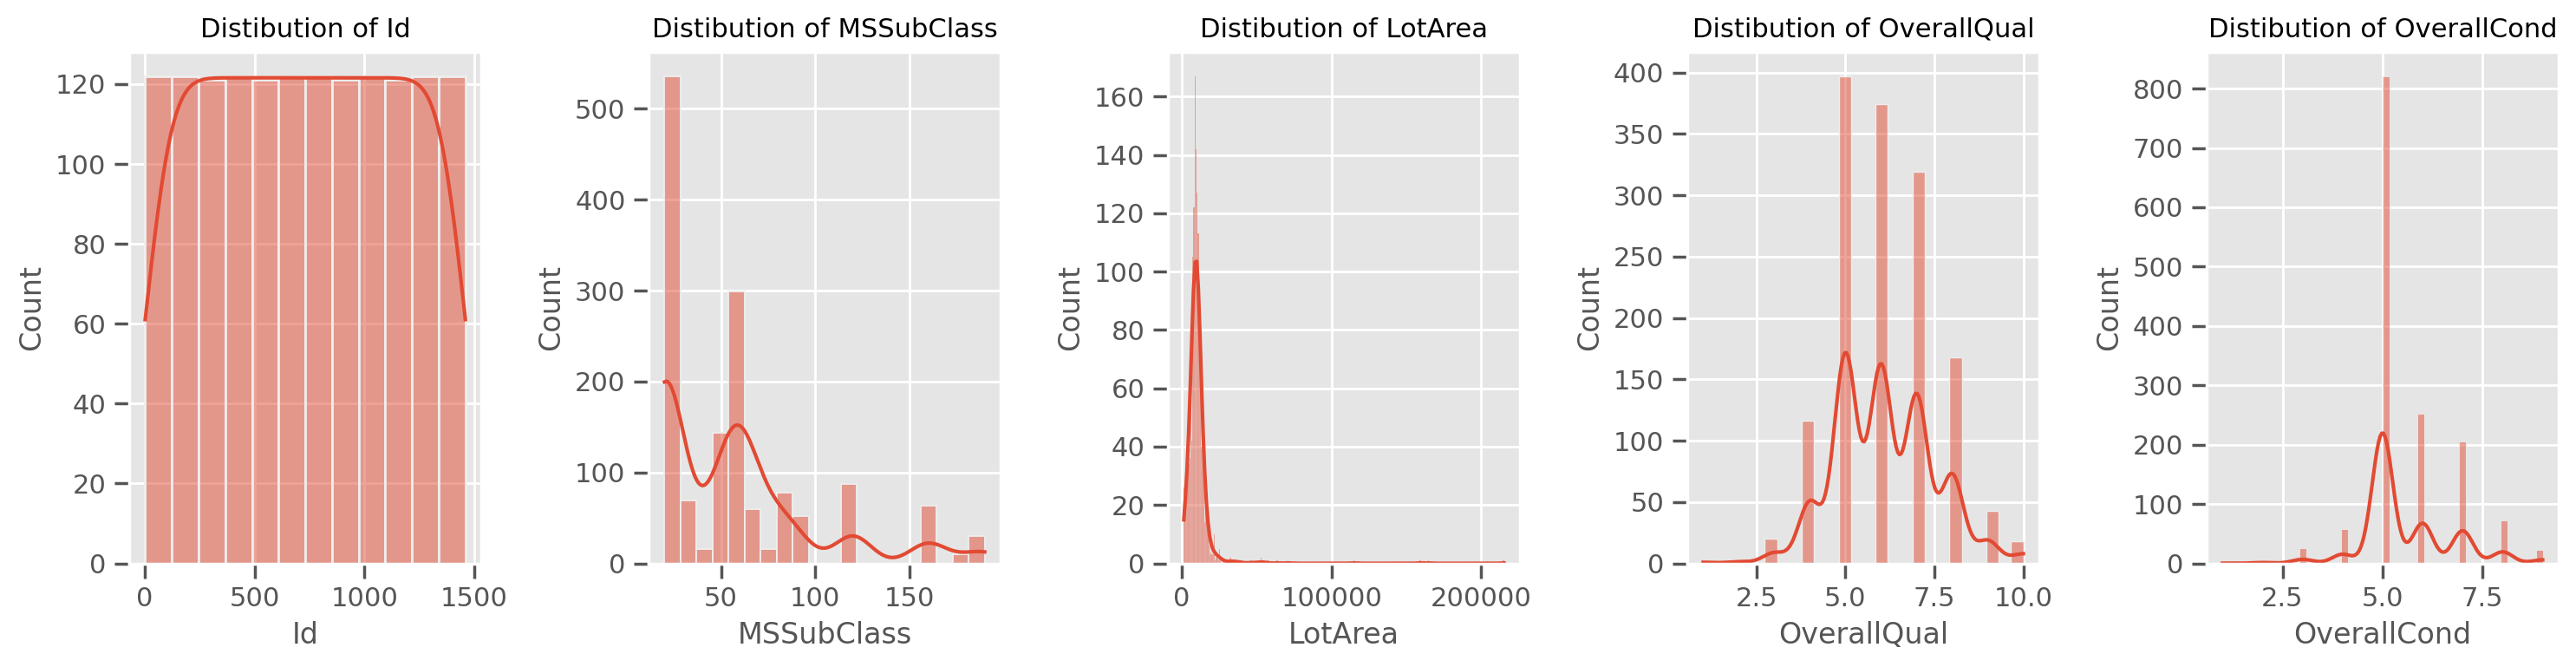

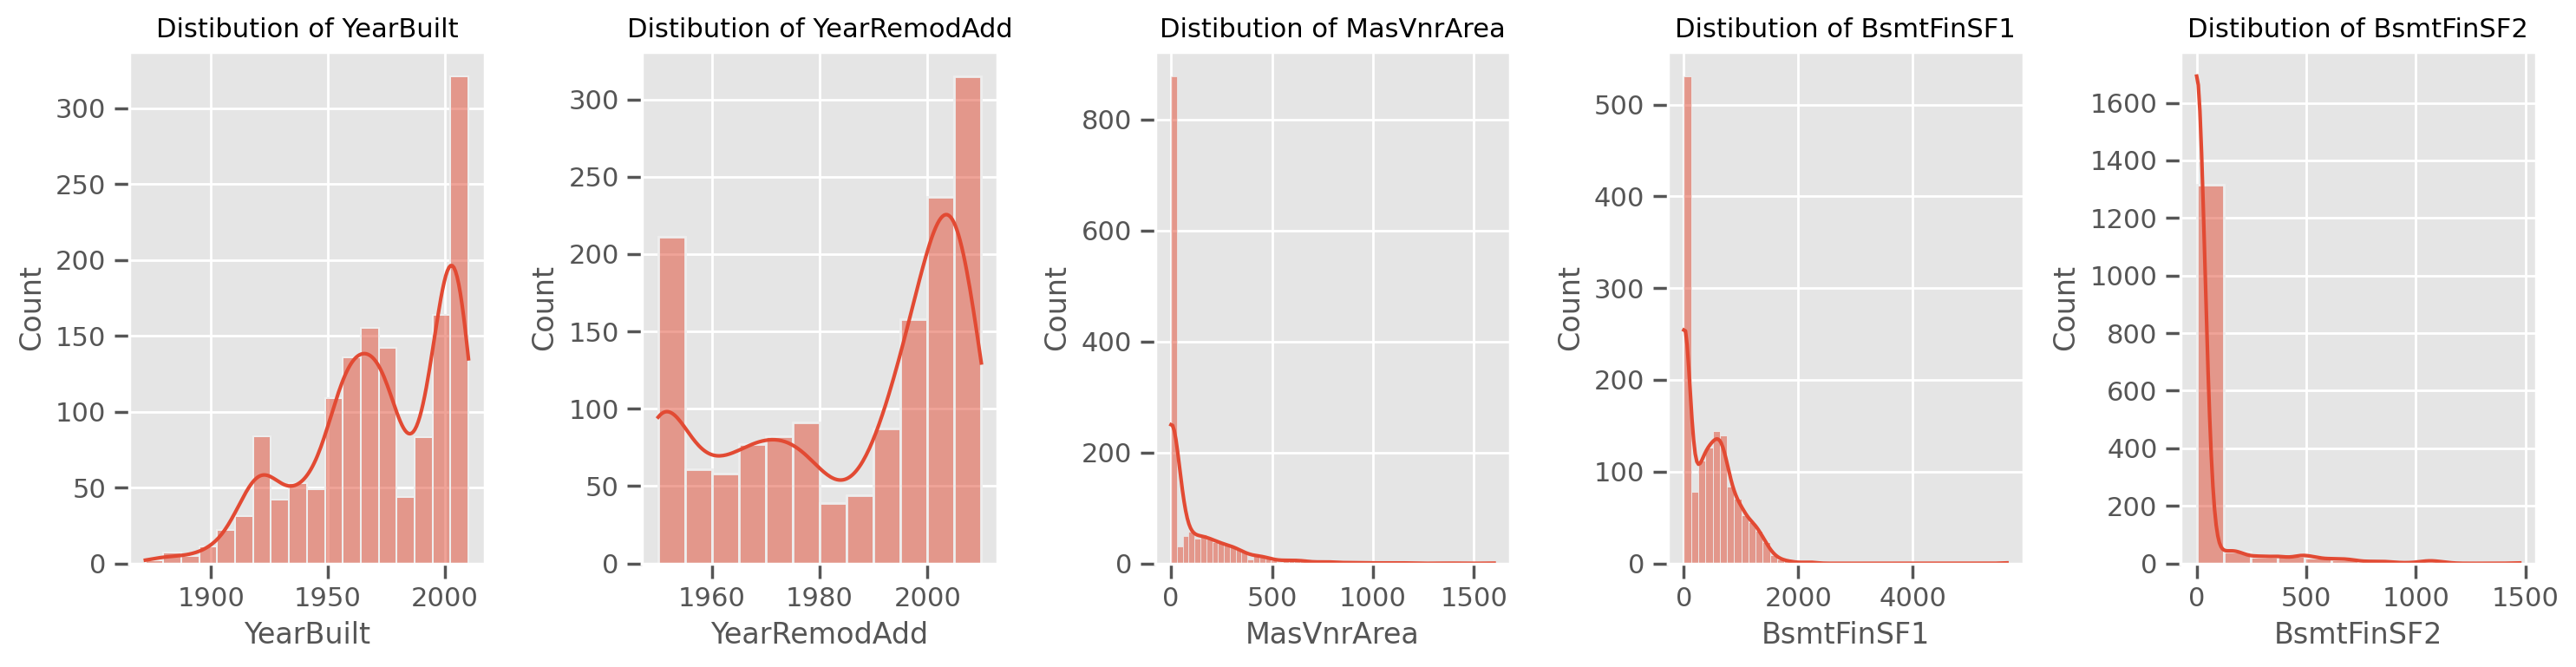

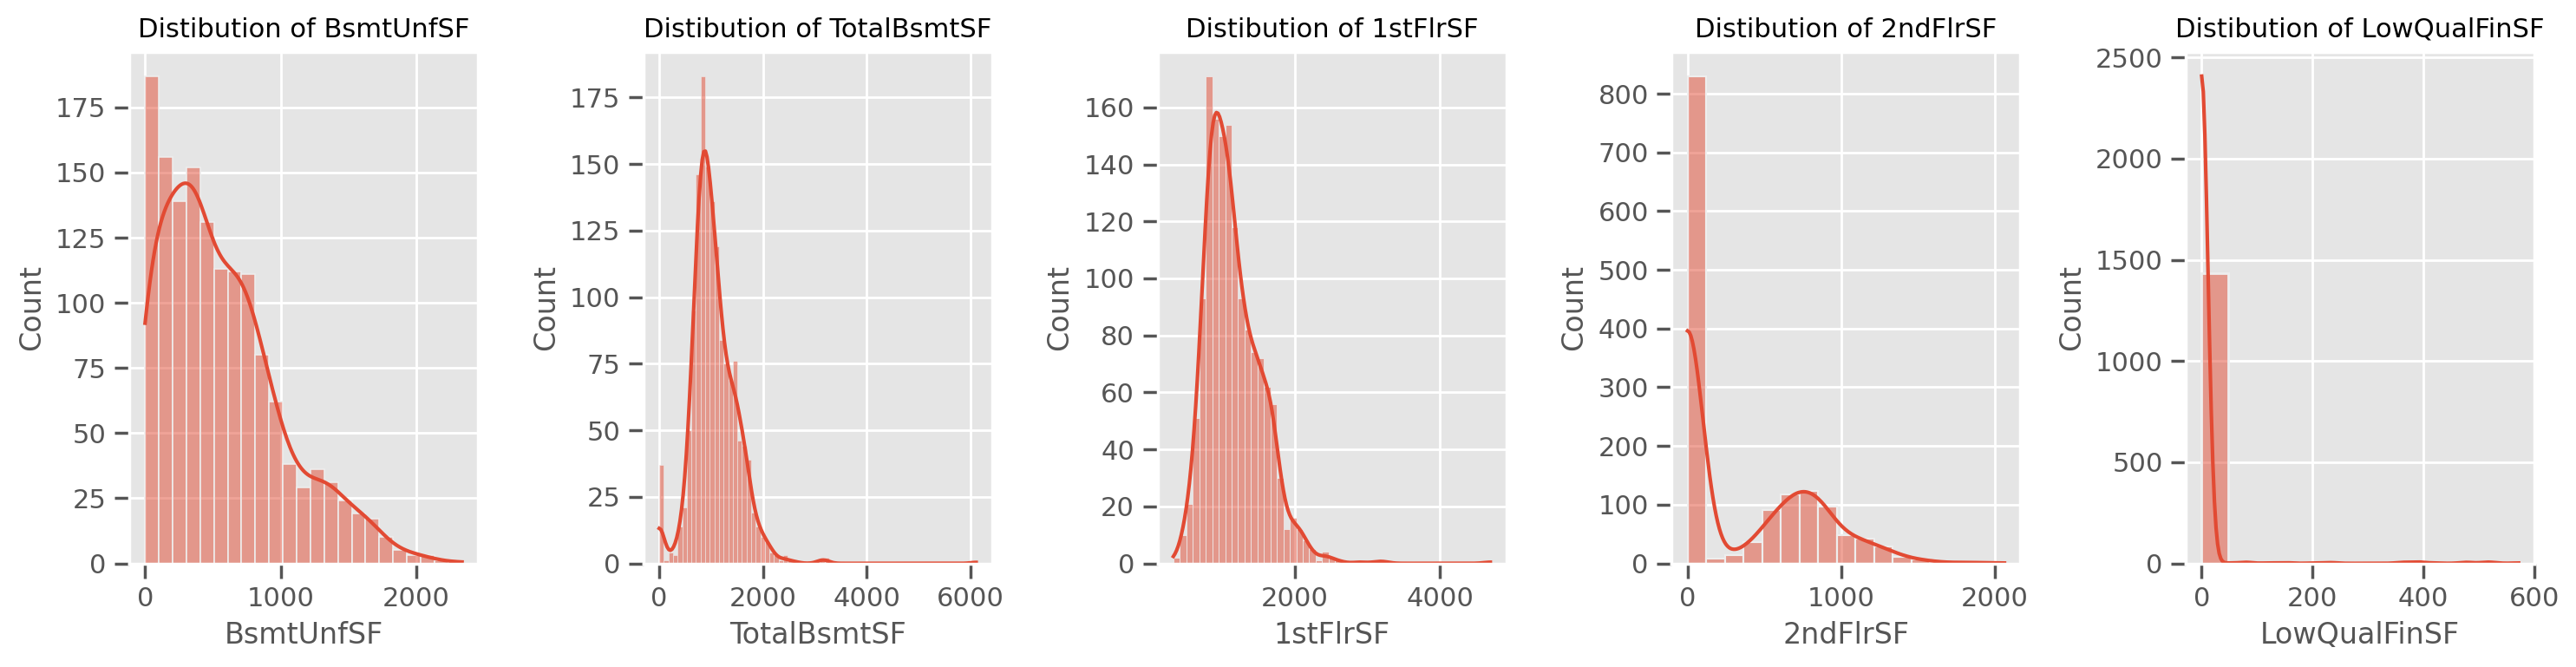

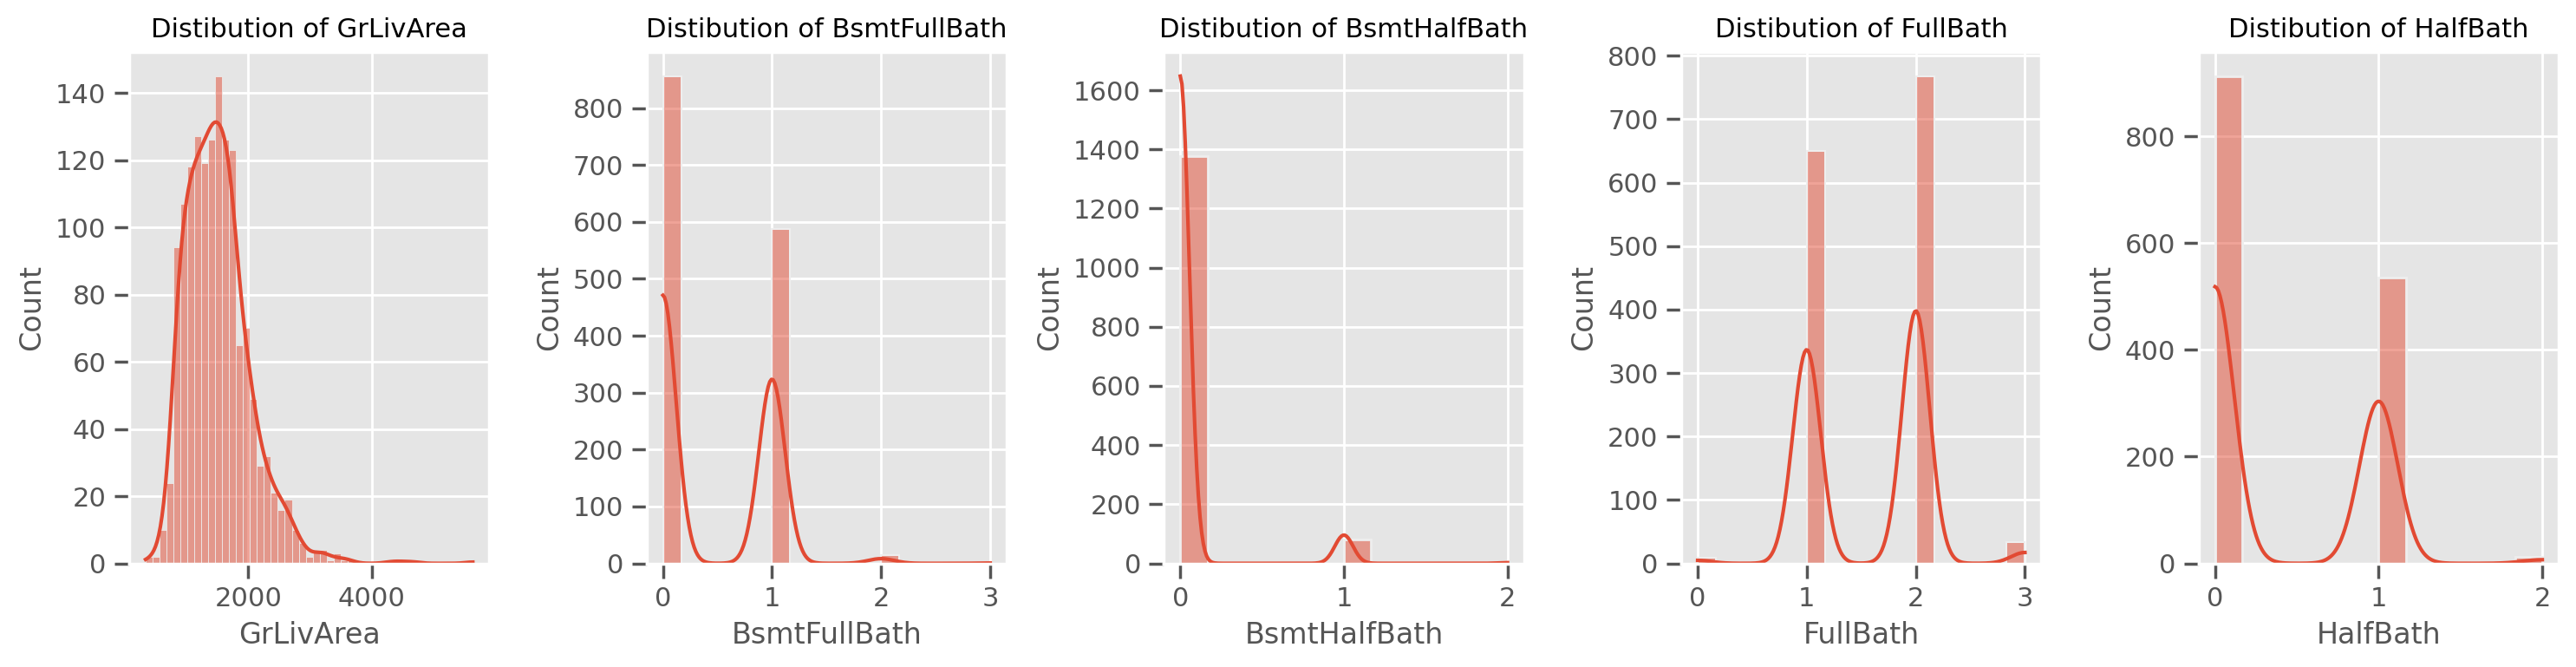

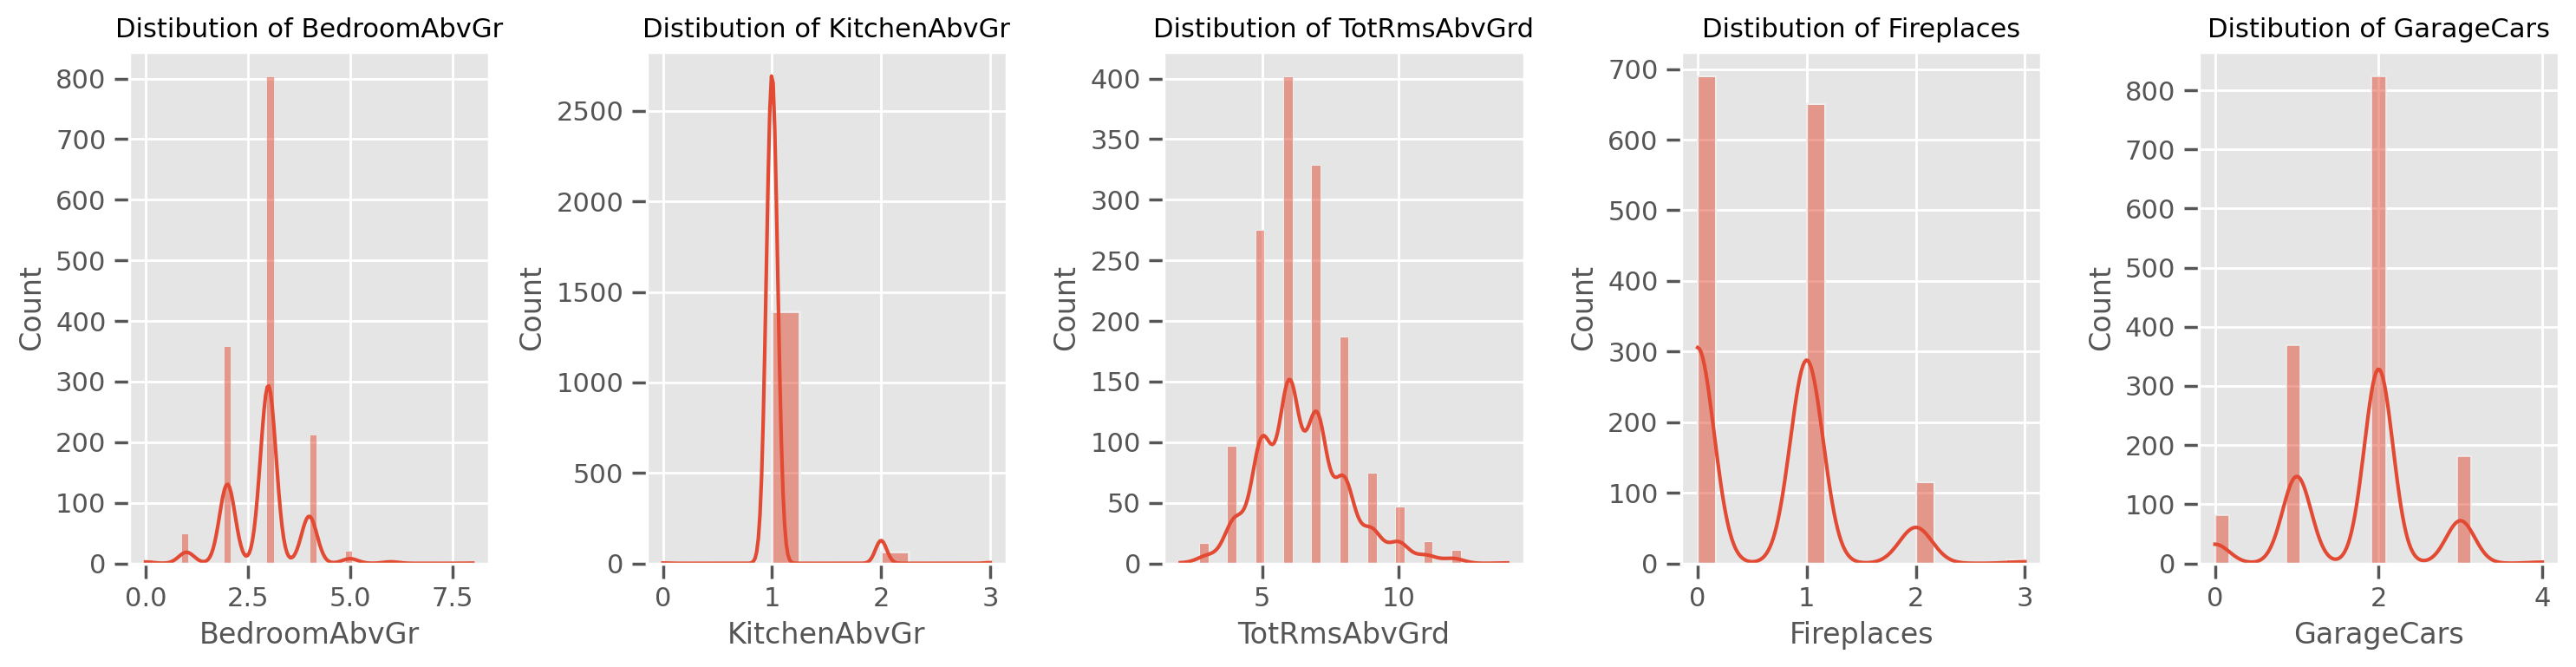

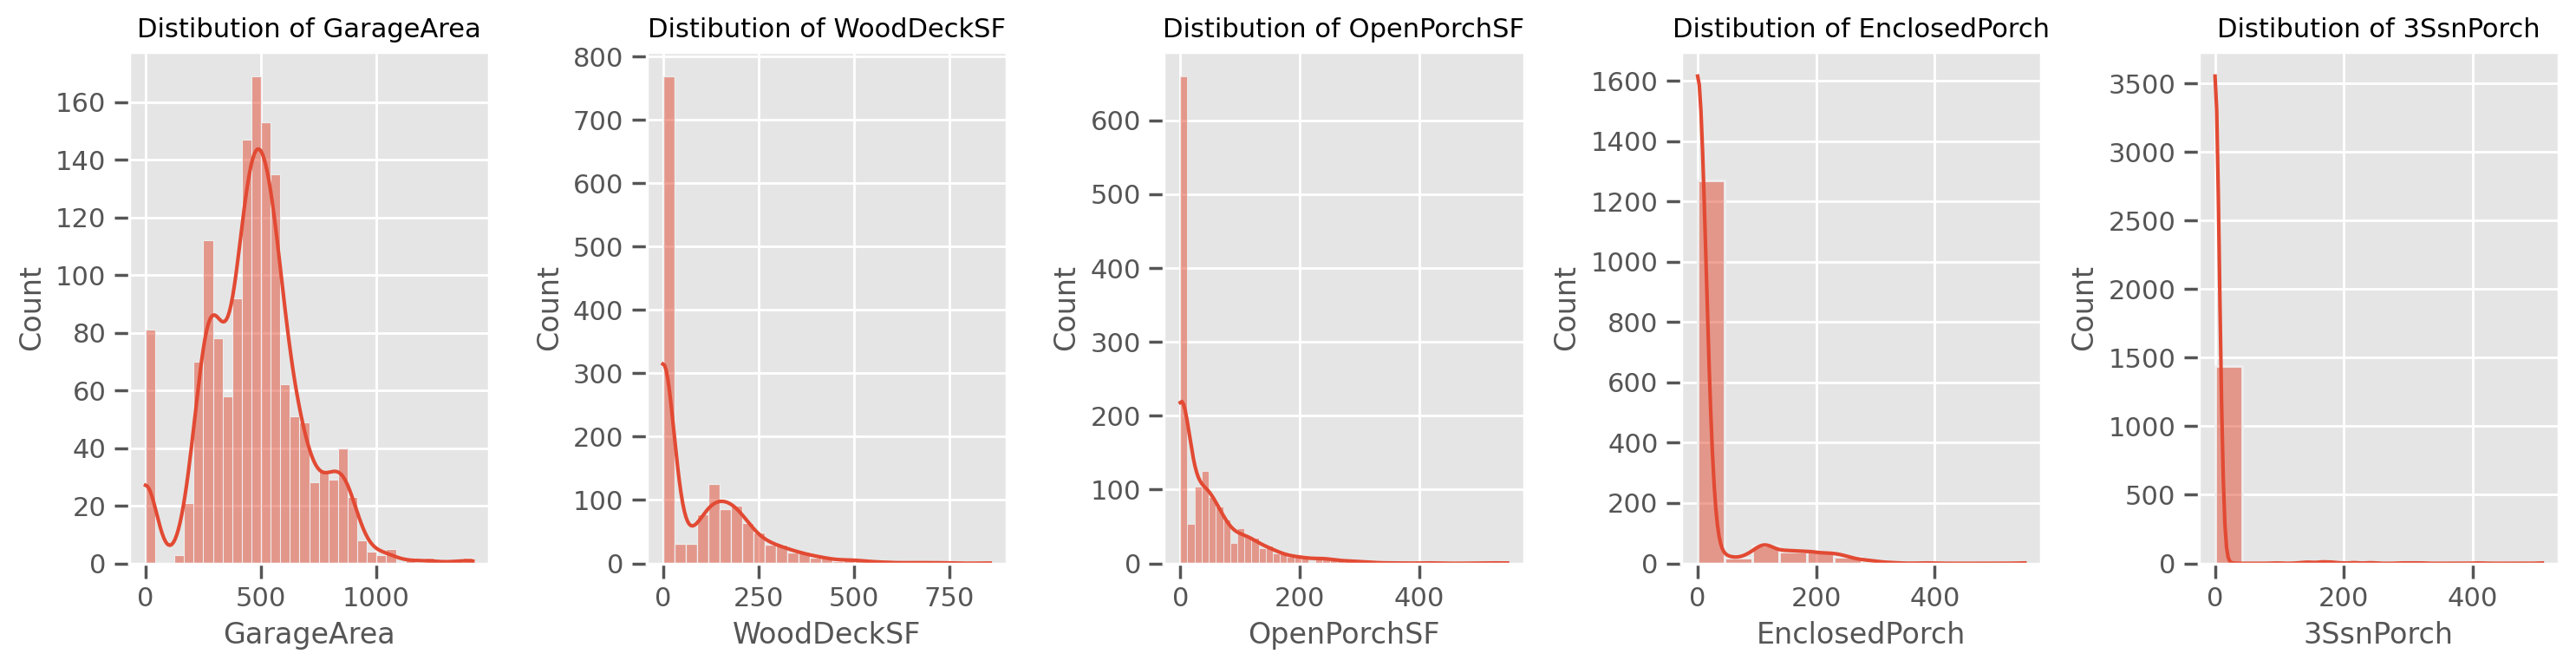

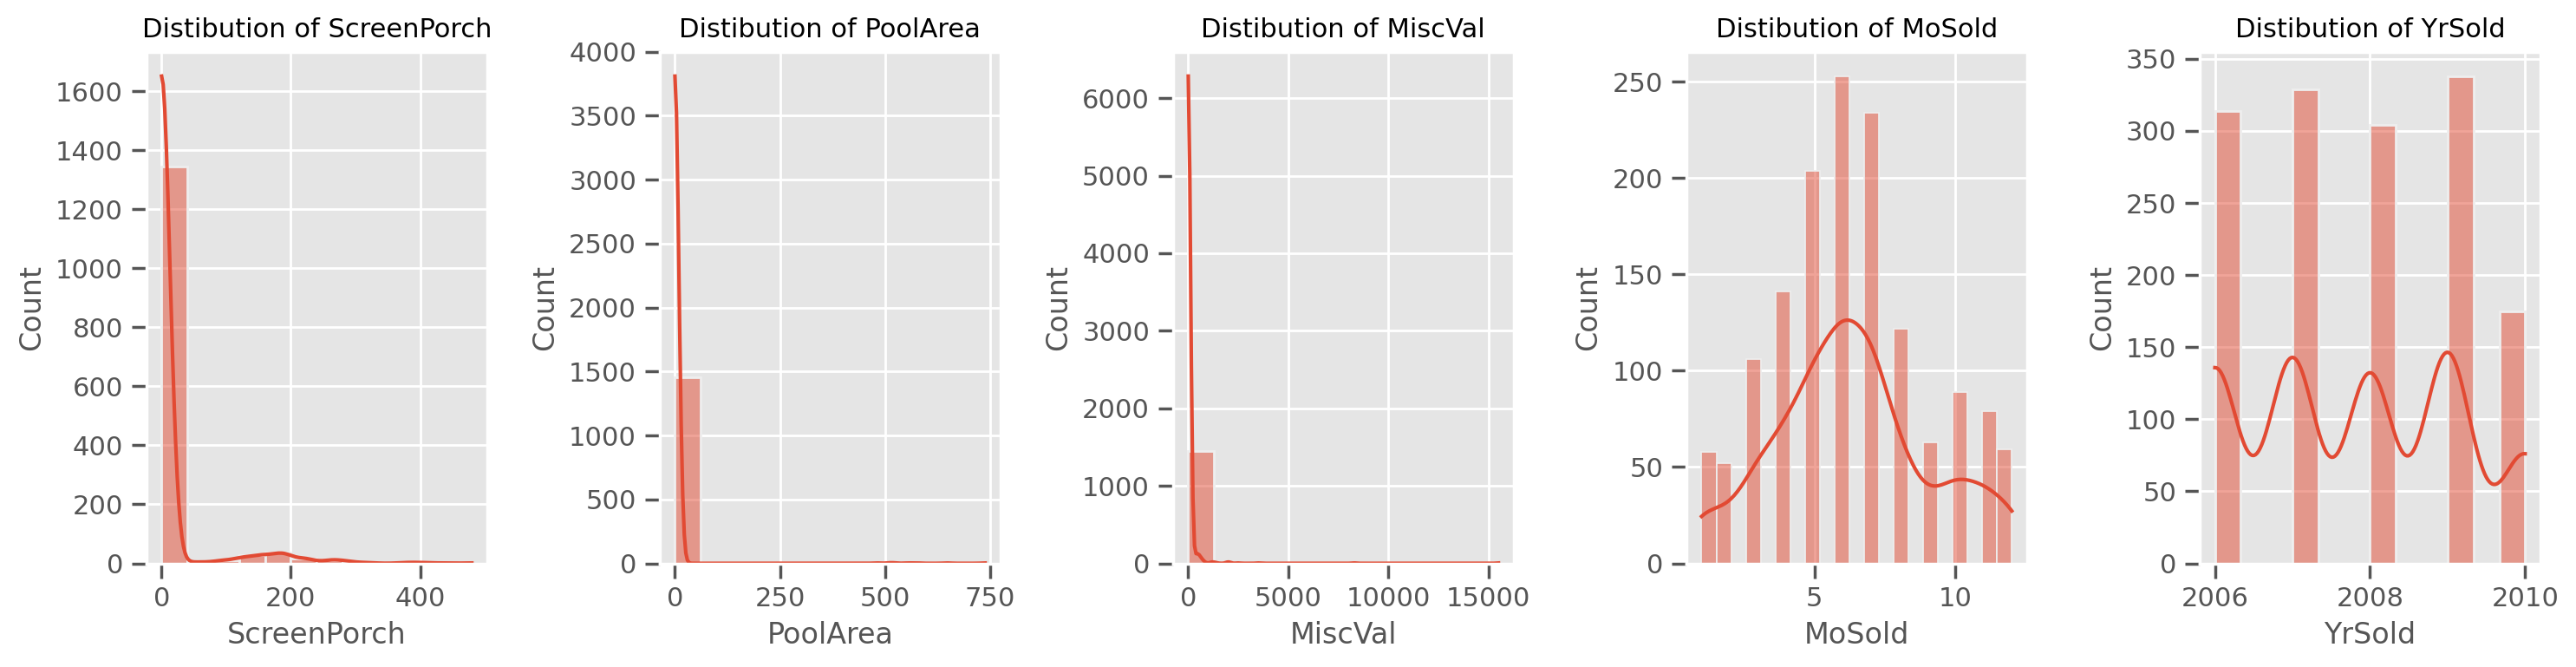

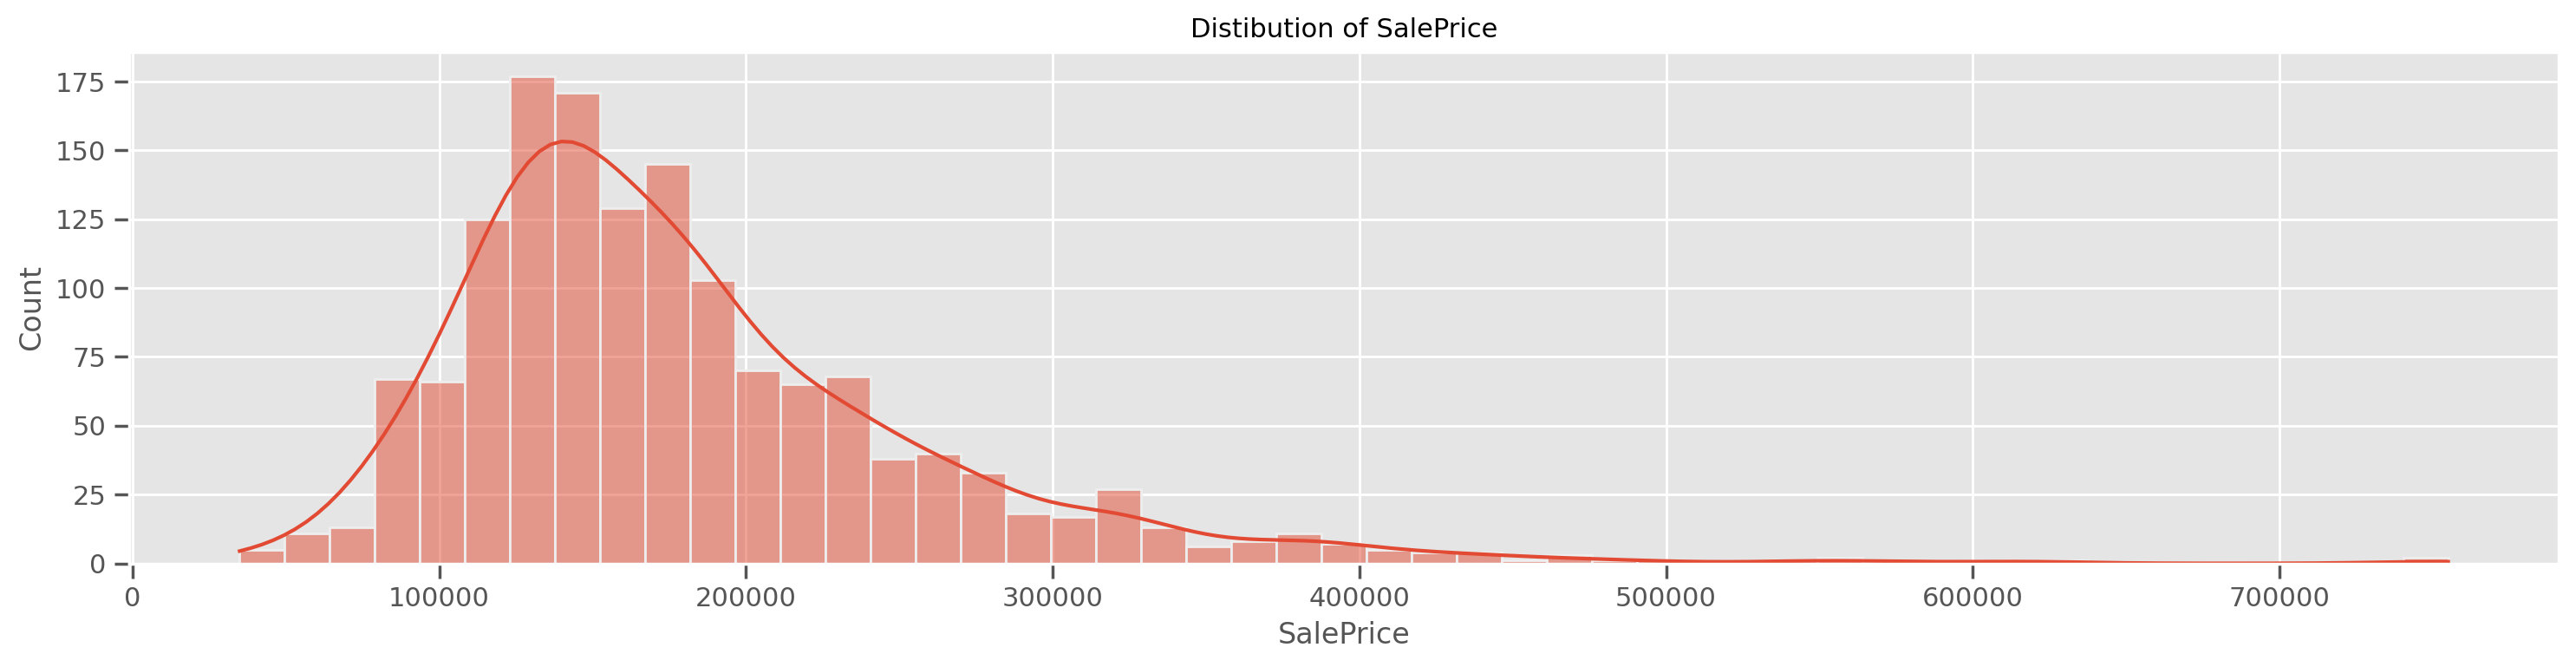

In [146]:
plots_in_sub = 5

for i in range(0, len(numeric_cols), plots_in_sub):
    features_in_sub = numeric_cols[i : i + plots_in_sub]
    fig, axes = plt.subplots(1, len(features_in_sub), figsize=(15, 4))
    
    if len(features_in_sub) == 1:
        axes = [axes]

    for ax, feature in zip(axes, features_in_sub):
        
        sns.histplot(data=train_df, x=feature, kde=True, ax=ax)
        ax.set_title(f'Distibution of {feature}', fontsize=11)

    plt.tight_layout()
    plt.show()

In [147]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])

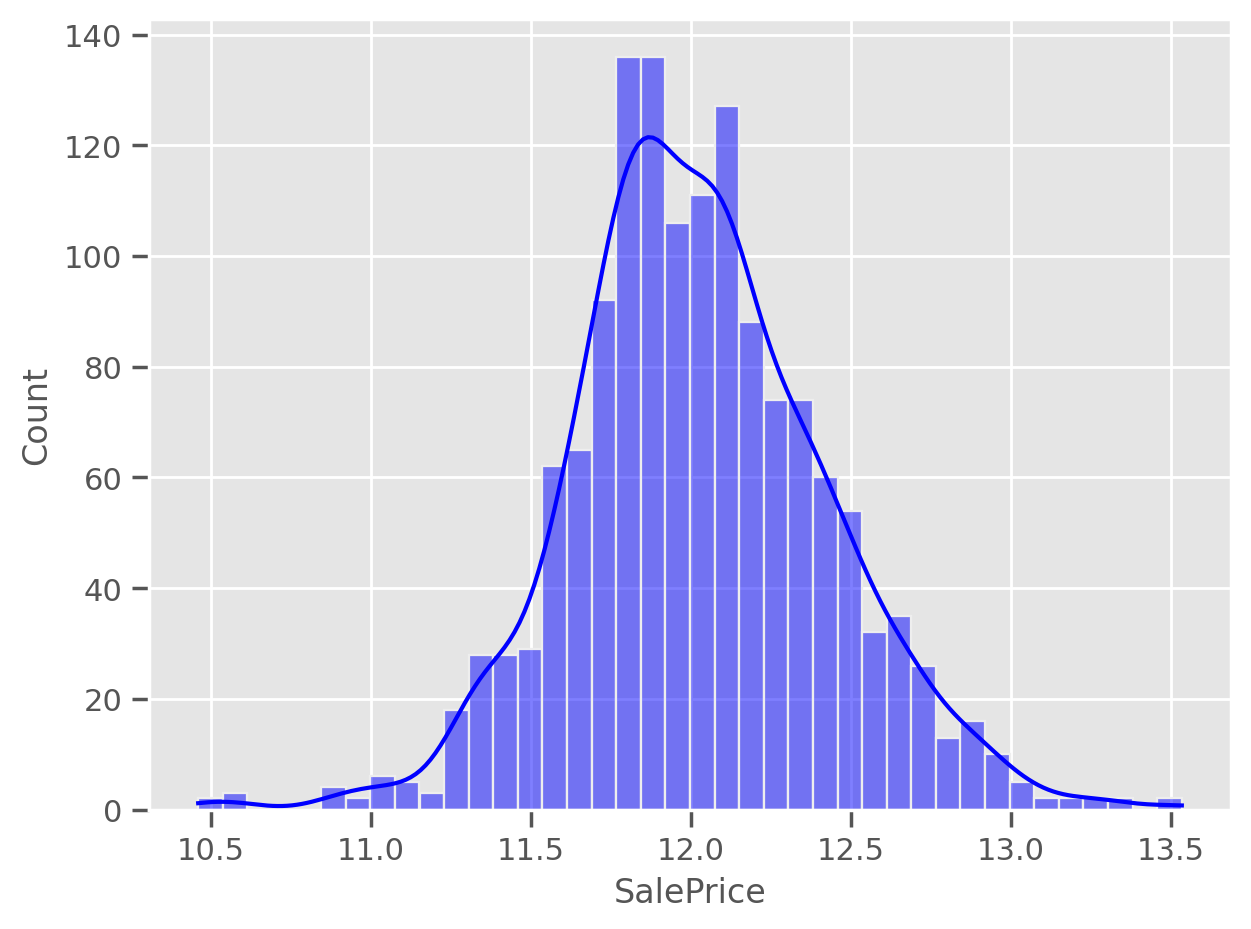

In [148]:

sns.histplot(x=train_df['SalePrice'], kde=True, bins=40, color='blue')
plt.tight_layout()
plt.show()

### <a id='toc1_5_1_'></a>[Remove Outliers](#toc0_)

In [149]:
features_to_trim = [
    'SalePrice', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
]

top_index_per_feature = {}
for col in features_to_trim:
    top_index_per_feature[col] = train_df[train_df[col] > train_df[col].quantile(.98)].index.tolist()

print('Amout of Rows to Drop for each Feature' + '\n' + '-'*40, end='')
{key: len(indexes) for key, indexes in top_index_per_feature.items()}

Amout of Rows to Drop for each Feature
----------------------------------------

{'SalePrice': 30,
 'LotArea': 30,
 'MasVnrArea': 30,
 'BsmtFinSF1': 30,
 'BsmtFinSF2': 30,
 'TotalBsmtSF': 30,
 '1stFlrSF': 30,
 '2ndFlrSF': 30,
 'GrLivArea': 30,
 'GarageArea': 30,
 'WoodDeckSF': 30,
 'OpenPorchSF': 30,
 'EnclosedPorch': 30}

In [150]:
unique_indexes = set([
    index
    for indexes in top_index_per_feature.values()
        for index in indexes
])
train_df.drop(unique_indexes, axis=0, inplace=True)
print(f'Train Set Shape After Removal: {train_df.shape}')


Train Set Shape After Removal: (1226, 52)


# <a id='toc2_'></a>[Training and Testing Linear Models](#toc0_)
- Filter by Correlation
- Prepare Data for Training
- Train and Evaluate
- Visualize Results
- Run Inferance and Save Results

## <a id='toc2_1_'></a>[Filter by Correlation](#toc0_)

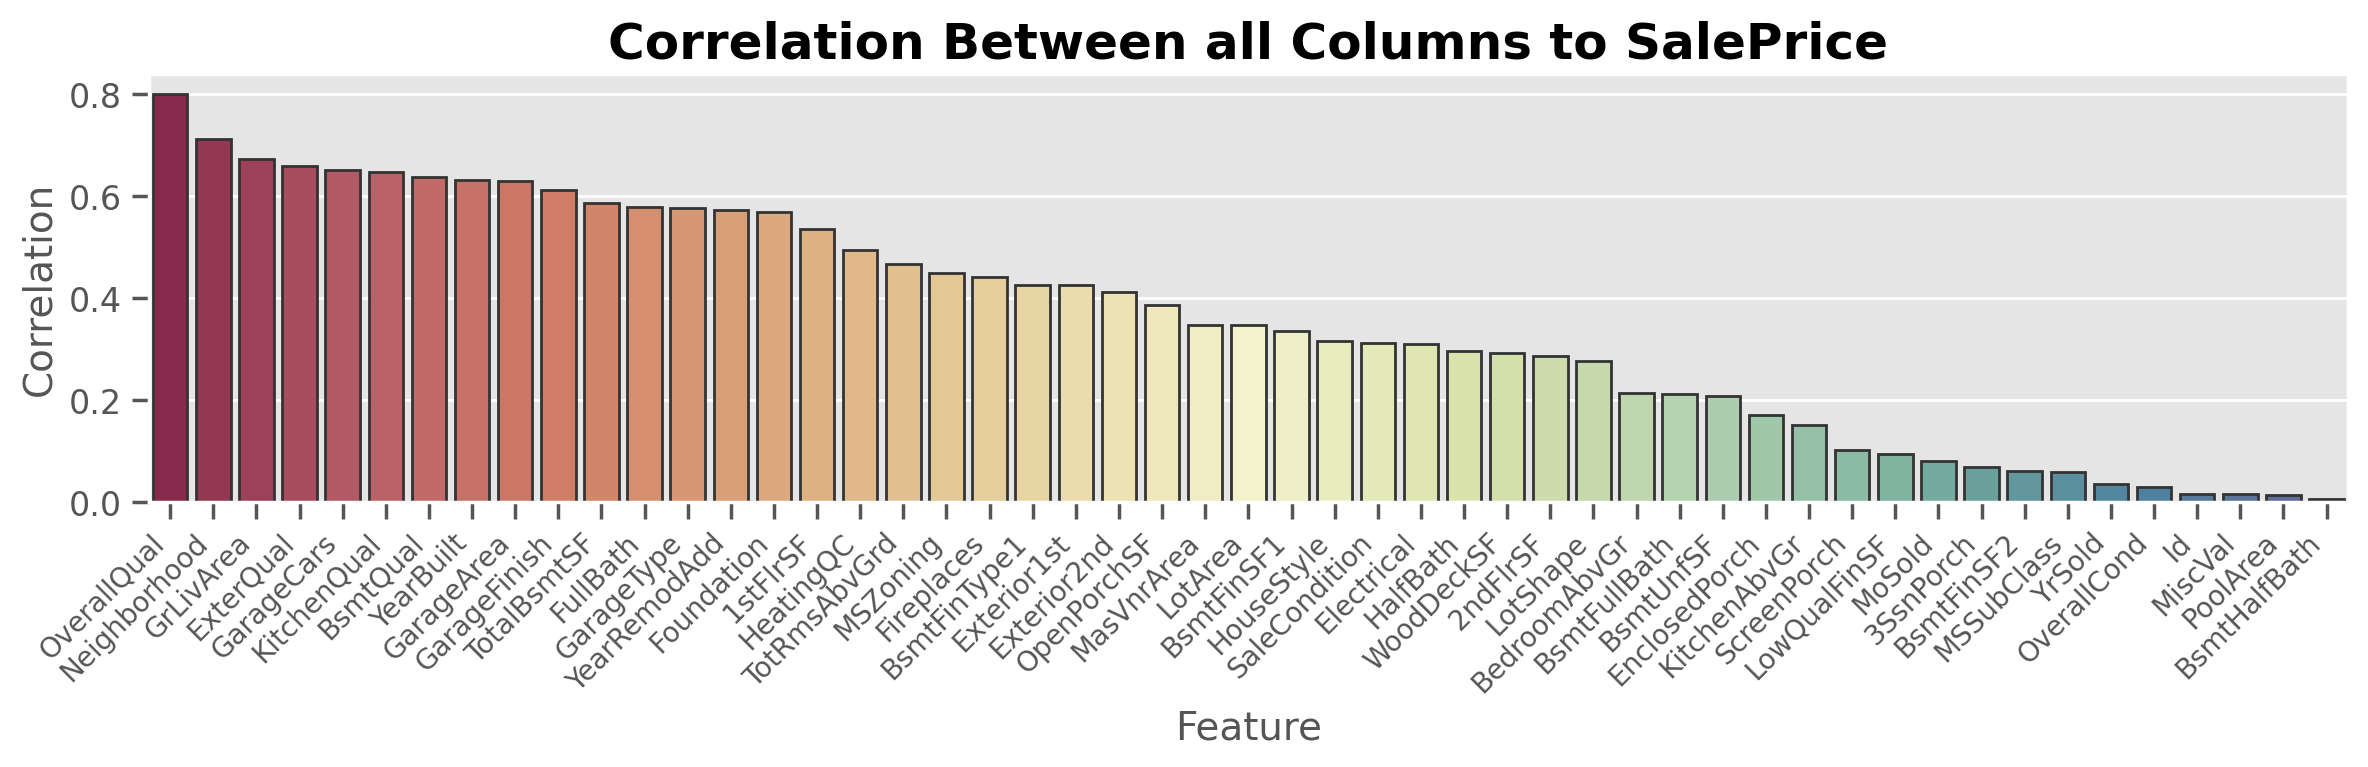

In [151]:
corr_with_traget = abs(train_df.corr()['SalePrice']).sort_values(ascending=False).drop('SalePrice')
sorted_corrs = corr_with_traget.sort_values(ascending=False)

fig = plt.figure(figsize=(12, 4))

sns.barplot(x=sorted_corrs.index, y=sorted_corrs.values, palette='Spectral', saturation=0.6, edgecolor=".2")

plt.title('Correlation Between all Columns to SalePrice', fontsize=18, weight='bold')

plt.xlabel('Feature', fontsize=14), plt.ylabel('Correlation', fontsize=14)
plt.xticks(fontsize=10, rotation=45, ha='right'), plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [152]:
inclue_feature = 10
sampeld_cols = corr_with_traget.iloc[:inclue_feature].index.tolist()

train_df_sub = train_df[sampeld_cols + ['SalePrice']]
test_df_sub = test_df[sampeld_cols]

print(f'Features in train_df_sub/test_df_sub ({len(sampeld_cols)}):')
sampeld_cols

Features in train_df_sub/test_df_sub (10):


['OverallQual',
 'Neighborhood',
 'GrLivArea',
 'ExterQual',
 'GarageCars',
 'KitchenQual',
 'BsmtQual',
 'YearBuilt',
 'GarageArea',
 'GarageFinish']

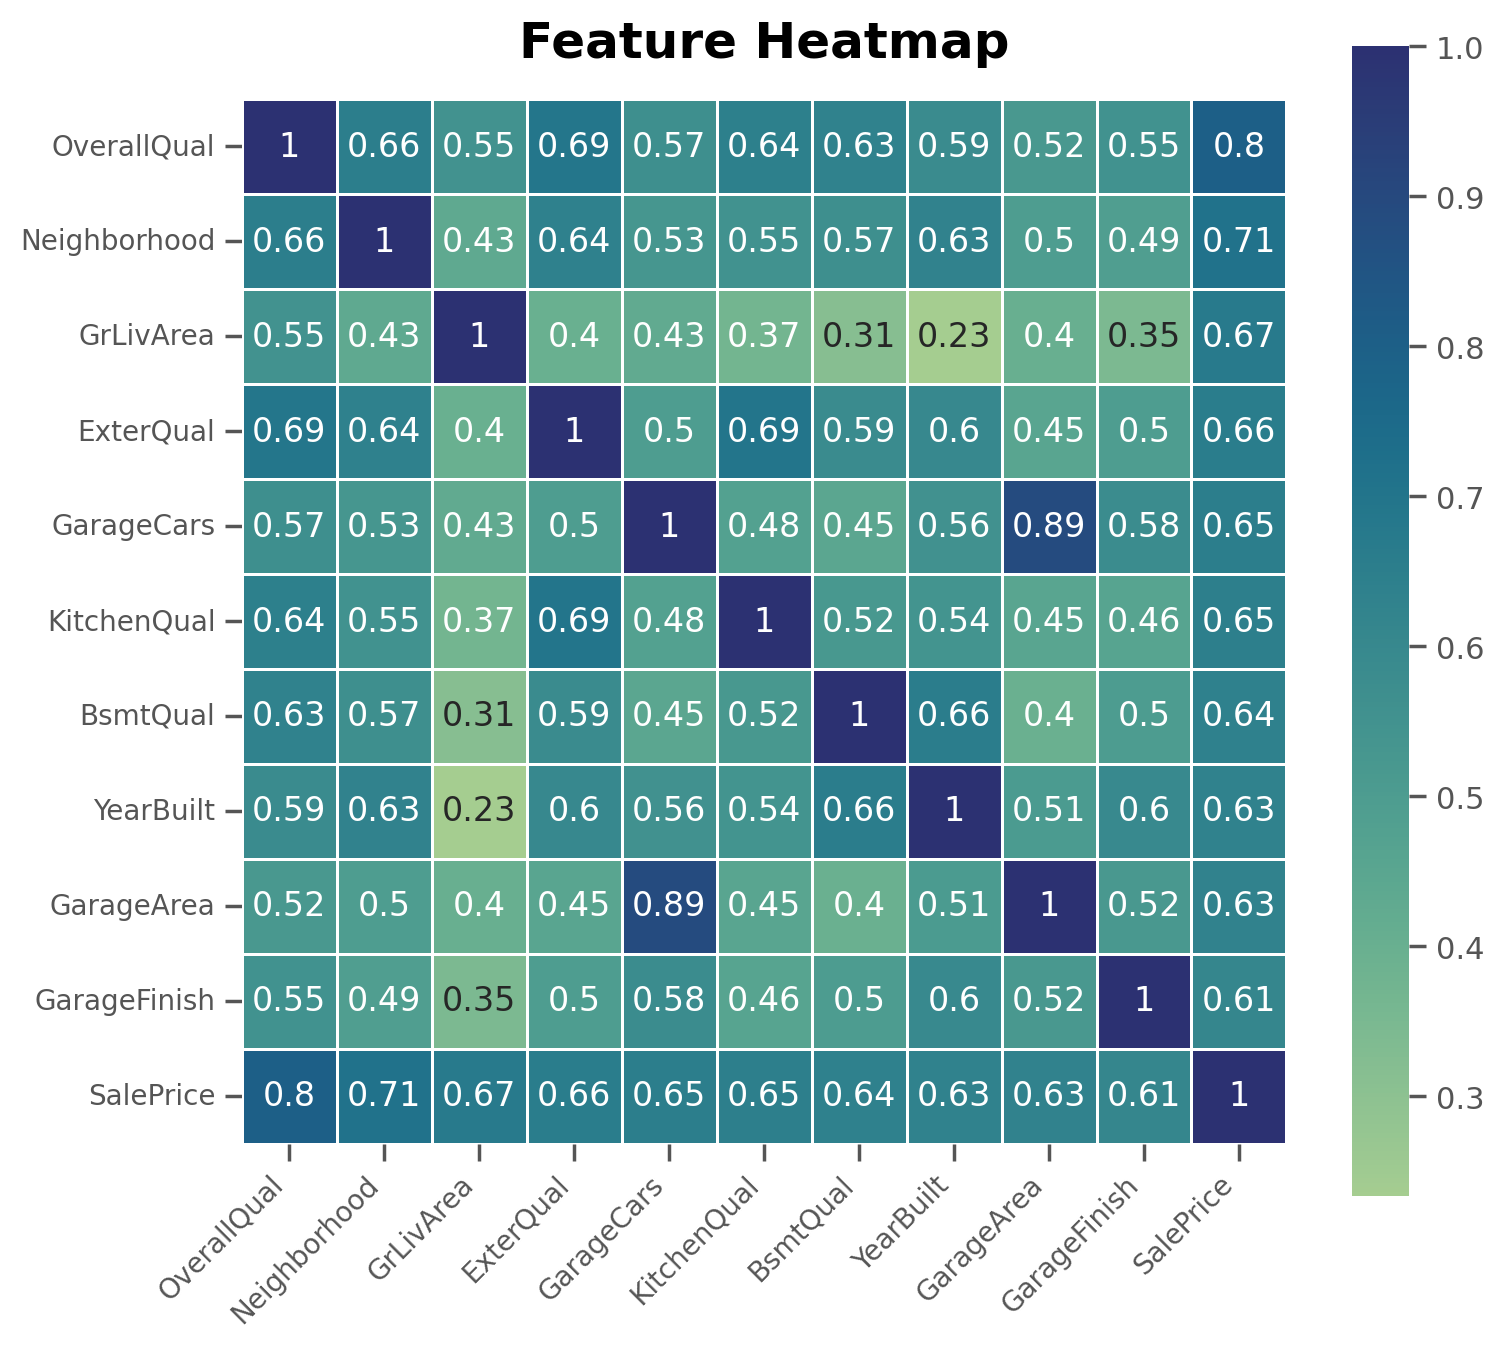

In [153]:
fig = plt.figure(figsize=(8, 7))

sns.heatmap(train_df_sub.corr(), cmap='crest', annot=True, linewidths=0.4, square=True)

plt.title('Feature Heatmap', weight='bold', pad=15, fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha='right'), plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [154]:
# GarageCars Seems to have Large Correlation to GarageArea Which is Exected
# In Using Linear Regression It's Better to Drop Highly Correlated Features from X set
train_df_sub.drop('GarageCars', axis=1, inplace=True)
test_df_sub.drop('GarageCars', axis=1, inplace=True)

In [155]:
train_predictors = train_df_sub.drop('SalePrice', axis=1).copy()
train_predictors.fillna(0, inplace=True)

test_predictors = test_df_sub.copy()
test_predictors.fillna(0, inplace=True)

train_target = train_df_sub['SalePrice'].copy()

## <a id='toc2_2_'></a>[Prepare for Training](#toc0_)

In [156]:
from sklearn.preprocessing import StandardScaler
def prepare_dataset(X_train_df, y_train_df, X_test_df, scale_target=False):
    X_train, y_train, X_test = X_train_df.to_numpy().copy(), y_train_df.to_numpy().copy(), X_test_df.to_numpy().copy()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if scale_target:
        return X_train_scaled, scaler.transform(y_train), X_test_scaled
    
    return X_train_scaled, y_train, X_test_scaled

In [157]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test = prepare_dataset(train_predictors, train_target, test_predictors)

# train 2/3 | validation 1/3
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
print(f'X_train :{X_train.shape}, X_val: {X_val.shape}, y_train: {y_train.shape}, y_test: {y_val.shape}')

X_train :(821, 9), X_val: (405, 9), y_train: (821,), y_test: (405,)


## <a id='toc2_3_'></a>[Train and Evaluate](#toc0_)

In [158]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, root_mean_squared_error

regression_models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1, max_iter=10000),
    'Lasso': Lasso(alpha=0.1, max_iter=10000)
}

training_results = {'Train': {}, 'Validation': {}}
for name, model in regression_models.items():
    model.fit(X_train, y_train)

    val_preds = model.predict(X_val)
    train_perds = model.predict(X_train)

    train_rsquared, val_rsquared = model.score(X_train, y_train) ,model.score(X_val, y_val)
    train_mse, val_mse = mean_squared_error(y_train, train_perds) ,mean_squared_error(y_val, val_preds)
    train_rmse, val_rmse = root_mean_squared_error(y_train, train_perds) ,root_mean_squared_error(y_val, val_preds)

    training_results['Train'][name] = {'MSE': train_mse, 'RMSE': train_rmse, 'RSquared': train_rsquared}
    training_results['Validation'][name] = {'MSE': val_mse, 'RMSE': val_rmse, 'RSquared': val_rsquared}

## <a id='toc2_4_'></a>[Visualize Results](#toc0_)

In [159]:
results_dfs = []
for results_set in training_results:
    df = pd.DataFrame(training_results[results_set]).T
    df['Set'] = results_set
    results_dfs.append(df)

models_evaluation = pd.concat(results_dfs, axis=0)
models_evaluation = models_evaluation.reset_index().rename(columns={'index': 'Model'}).copy()

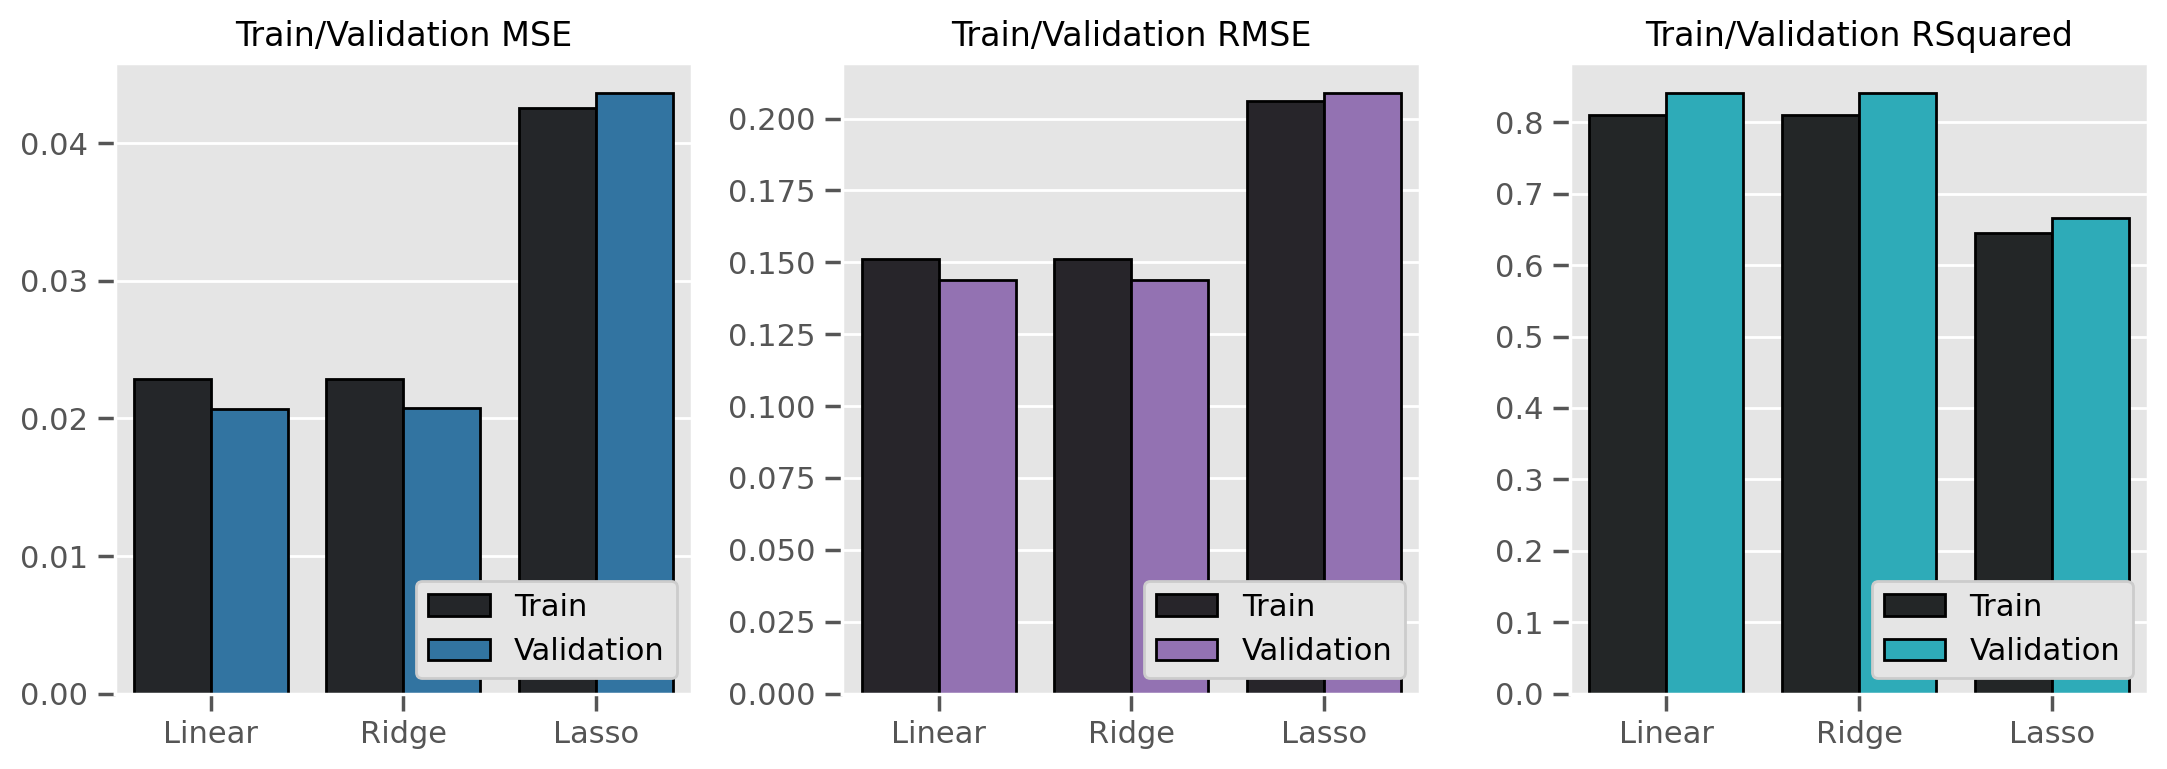

            Linear     Ridge     Lasso
MSE       0.020720  0.020727  0.043672
RMSE      0.143946  0.143967  0.208978
RSquared  0.841486  0.841439  0.665906


In [160]:
palette = sns.color_palette('tab10', desat=1)
metrics = ['MSE', 'RMSE', 'RSquared']
fig, axes = plt.subplots(1, len(metrics), figsize=(11, 4))

for metric, ax in zip(metrics, axes):
    sns.barplot(
        data=models_evaluation, 
        x='Model', y=metric, hue='Set',
        edgecolor='black',
        ax=ax,
        color=random.choice(palette)
    )
    ax.set_title(f'Train/Validation {metric}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(loc='lower right', framealpha=1)

plt.tight_layout()
plt.show()
print(pd.DataFrame(training_results['Validation']))

# <a id='toc3_'></a>[Fit a Neural Network](#toc0_)
- Filter and Prepare Dataset
- Define Train and Validation Sets
- Train Simple Network
- Visualize Training Results

## <a id='toc3_1_'></a>[Filter and Prepare Datase](#toc0_)

In [161]:
inclue_feature = None
sampeld_cols = corr_with_traget.iloc[:inclue_feature].index.tolist()

train_df_sub = train_df[sampeld_cols + ['SalePrice']]
test_df_sub = test_df[sampeld_cols]

print(f'Features in train_df_sub/test_df_sub ({len(sampeld_cols)}):')
sampeld_cols

Features in train_df_sub/test_df_sub (51):


['OverallQual',
 'Neighborhood',
 'GrLivArea',
 'ExterQual',
 'GarageCars',
 'KitchenQual',
 'BsmtQual',
 'YearBuilt',
 'GarageArea',
 'GarageFinish',
 'TotalBsmtSF',
 'FullBath',
 'GarageType',
 'YearRemodAdd',
 'Foundation',
 '1stFlrSF',
 'HeatingQC',
 'TotRmsAbvGrd',
 'MSZoning',
 'Fireplaces',
 'BsmtFinType1',
 'Exterior1st',
 'Exterior2nd',
 'OpenPorchSF',
 'MasVnrArea',
 'LotArea',
 'BsmtFinSF1',
 'HouseStyle',
 'SaleCondition',
 'Electrical',
 'HalfBath',
 'WoodDeckSF',
 '2ndFlrSF',
 'LotShape',
 'BedroomAbvGr',
 'BsmtFullBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'KitchenAbvGr',
 'ScreenPorch',
 'LowQualFinSF',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'MSSubClass',
 'YrSold',
 'OverallCond',
 'Id',
 'MiscVal',
 'PoolArea',
 'BsmtHalfBath']

In [162]:
print(f"""
Missing Values in Train {train_df_sub.isna().sum().sum()}, Missing Values in Test {test_df_sub.isna().sum().sum()}
-------------------------------------------------------------------
Train Set Cols: {train_df_sub.columns[train_df_sub.isna().sum(axis=0) != 0].tolist()}
Test Set Cols: {test_df_sub.columns[test_df_sub.isna().sum(axis=0) != 0].tolist()}
""")


Missing Values in Train 6, Missing Values in Test 25
-------------------------------------------------------------------
Train Set Cols: ['MasVnrArea']
Test Set Cols: ['GarageCars', 'GarageArea', 'TotalBsmtSF', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtHalfBath']



all features with missing values are features that could not exist within a house so replacing them all with 0 seems like a good option

In [163]:
train_df_sub.fillna(0, inplace=True)
test_df_sub.fillna(0, inplace=True)
print(f"""
Missing Values in Train {train_df_sub.isna().sum().sum()}, Missing Values in Test {test_df_sub.isna().sum().sum()}
""")


Missing Values in Train 0, Missing Values in Test 0



## <a id='toc3_2_'></a>[Define Train and Validation Sets](#toc0_)

In [164]:
X, y, X_test = prepare_dataset(
    X_train_df=train_df_sub.drop('SalePrice', axis=1).copy(), 
    y_train_df=train_df_sub['SalePrice'].copy(), 
    X_test_df=test_df_sub.copy()
)
# train 2/3 | validation 1/3
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.copy().astype(np.float32)
X_val = X_val.copy().astype(np.float32)
y_train = y_train.copy().astype(np.float32)
y_val = y_val.copy().astype(np.float32)

for name, arr in [("X_train", X_train), ("y_train", y_train),
                  ("X_val",  X_val),   ("y_val",  y_val)]:
    print(f"{name}: shape={arr.shape},  dtype={arr.dtype}")


X_train: shape=(821, 51),  dtype=float32
y_train: shape=(821,),  dtype=float32
X_val: shape=(405, 51),  dtype=float32
y_val: shape=(405,),  dtype=float32


## <a id='toc3_3_'></a>[Train Simple Network](#toc0_)

In [165]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError, MeanSquaredError

In [166]:
inputs =  Input(shape=(X_train.shape[1],), dtype=tf.float32)

x = Dense(128)(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)

x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)

x = Dense(32)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)

outputs = Dense(1, activation='linear')(x)
model = Model(inputs, outputs)

In [167]:
model.summary(line_length=50, print_fn=print)

Model: "functional"
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape   ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer         │ (None, 51)     │       0 │
│ (InputLayer)        │                │         │
├─────────────────────┼────────────────┼─────────┤
│ dense (Dense)       │ (None, 128)    │   6,656 │
├─────────────────────┼────────────────┼─────────┤
│ batch_normalization │ (None, 128)    │     512 │
│ (BatchNormalizatio… │                │         │
├─────────────────────┼────────────────┼─────────┤
│ activation          │ (None, 128)    │       0 │
│ (Activation)        │                │         │
├─────────────────────┼────────────────┼─────────┤
│ dropout (Dropout)   │ (None, 128)    │       0 │
├─────────────────────┼────────────────┼─────────┤
│ dense_1 (Dense)     │ (None, 64)     │   8,256 │
├─────────────────────┼────────────────┼─────────┤
│ batch_normalizatio… │ (None, 64)     │     256 │
│ (BatchNor

In [168]:
tf.keras.backend.clear_session()

model.compile(
   optimizer=Adam(learning_rate=1e-3),
   loss='mse',
   metrics=[
       MeanSquaredError(name='MSE'), 
       RootMeanSquaredError(name='RMSE')
       ],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=1000,
)

Epoch 1/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MSE: 131.6196 - RMSE: 11.4721 - loss: 131.6196 - val_MSE: 133.1485 - val_RMSE: 11.5390 - val_loss: 133.1485
Epoch 2/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 120.1495 - RMSE: 10.9610 - loss: 120.1495 - val_MSE: 125.3710 - val_RMSE: 11.1969 - val_loss: 125.3710
Epoch 3/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 110.2733 - RMSE: 10.5007 - loss: 110.2733 - val_MSE: 117.1291 - val_RMSE: 10.8226 - val_loss: 117.1291
Epoch 4/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 98.8122 - RMSE: 9.9401 - loss: 98.8122 - val_MSE: 108.0410 - val_RMSE: 10.3943 - val_loss: 108.0410
Epoch 5/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 88.4274 - RMSE: 9.4032 - loss: 88.4274 - val_MSE: 99.3696 - val_RMSE: 9.9684 - val_loss: 99.3696
Epoch 6/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 78.4630 - RMSE: 8.8577 - loss: 78.4630 - val_MSE: 90.7956 - val_RMSE: 9.5287 - val_loss: 90.7956
Epoch 7/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 

## <a id='toc3_4_'></a>[Visualize Training Results](#toc0_)

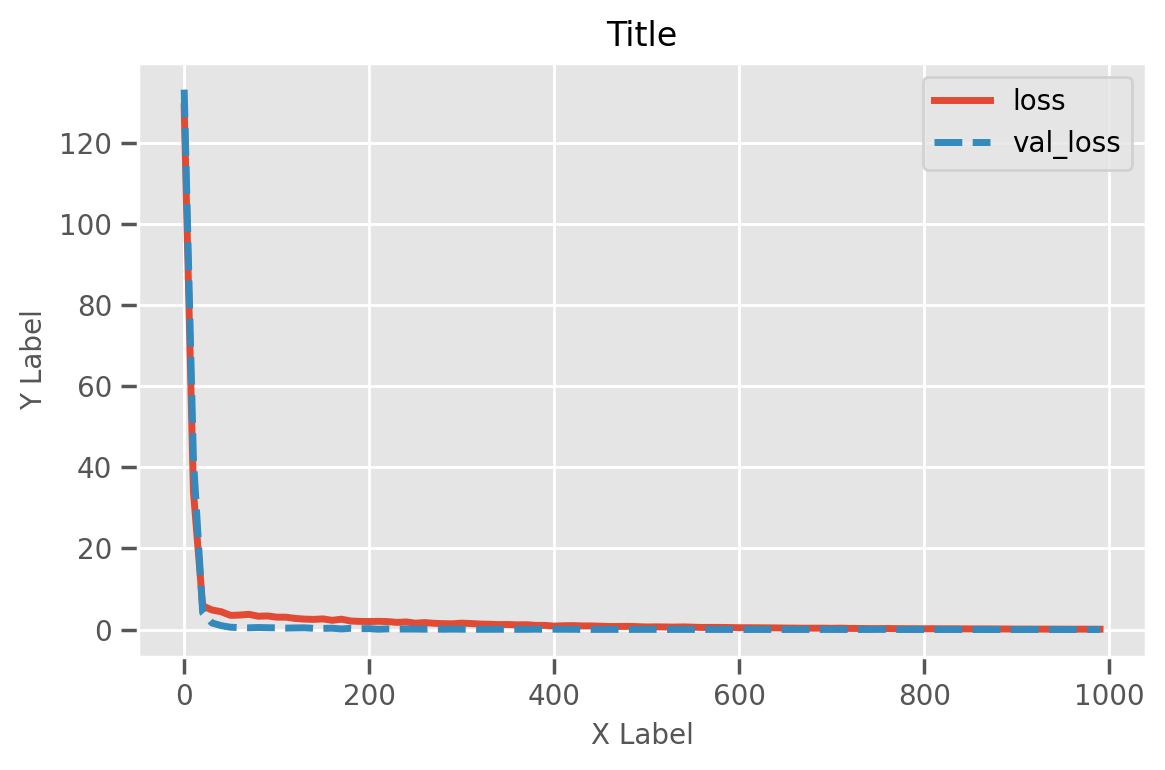

In [169]:
step = 10
history_df = pd.DataFrame(history.history).iloc[::step]
fig = plt.figure(figsize=(6, 4))
sns.lineplot(data=history_df[['loss', 'val_loss']], linewidth=2.5)
plt.title('Title')
plt.xlabel('X Label', fontsize=10), plt.ylabel('Y Label', fontsize=10)
plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# <a id='toc4_'></a>[Run Inferance and Save Results](#toc0_)

In [170]:
# use expm1 because we scaled sale price with log1p before training the model
# y_test = np.expm1(regression_models['Linear'].predict(X_test))
y_test = np.expm1(model.predict(X_test))

# make submission dataframe
test_df['SalePrice'] = y_test
submission = test_df[['Id', 'SalePrice']]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


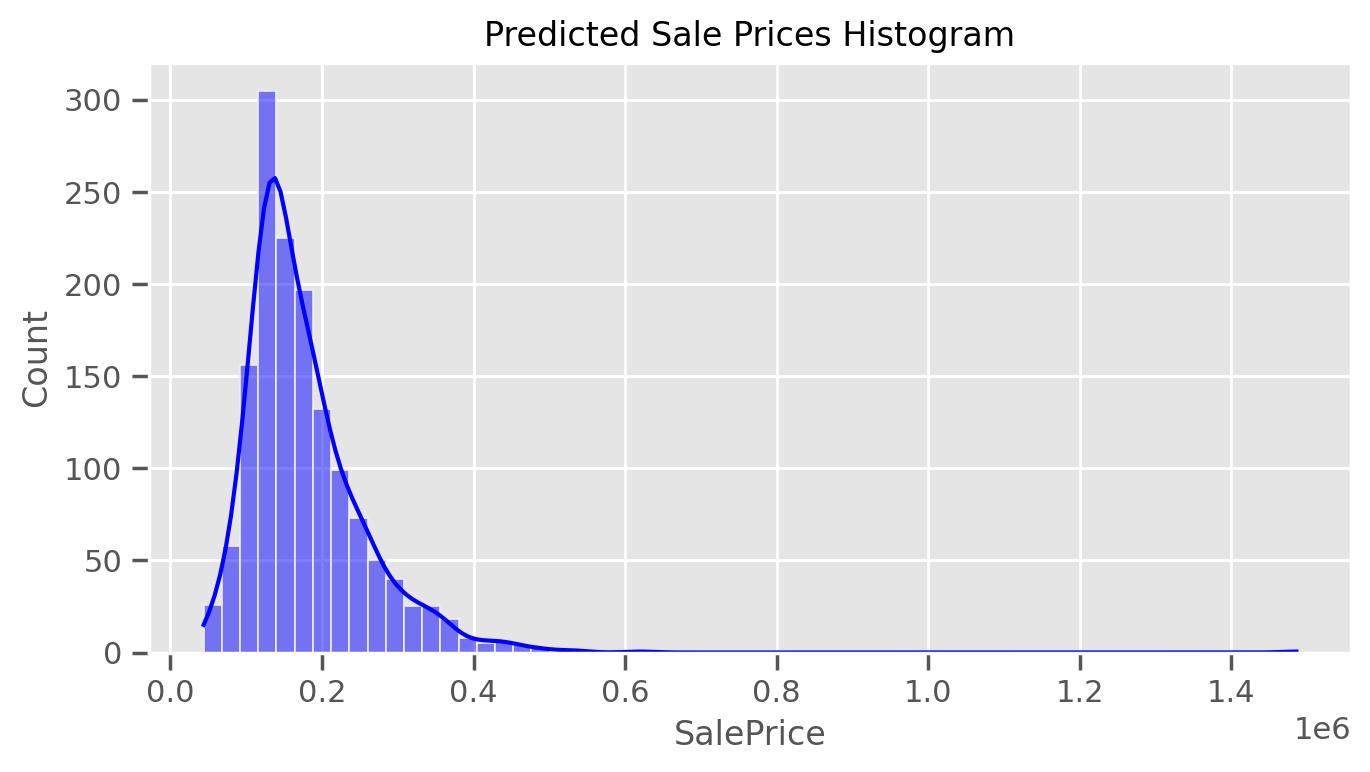

In [171]:
fig = plt.figure(figsize=(7, 4))
sns.histplot(x=submission['SalePrice'], kde=True, color='blue', bins=60)
plt.title('Predicted Sale Prices Histogram')
plt.tight_layout()
plt.show()

In [172]:
submission.to_csv('predictions.csv', index=False)
print('Predictions Saved:')
submission

Predictions Saved:


Id      SalePrice
0     1461  110372.750000
1     1462  102070.921875
2     1463  183163.906250
3     1464  194624.968750
4     1465  194634.250000
...    ...            ...
1454  2915   78133.476562
1455  2916   78879.031250
1456  2917  164413.687500
1457  2918  103595.492188
1458  2919  209376.671875

[1459 rows x 2 columns]